删除了 2 个高度相关的变量: {'latent_45', 'latent_5'}
剩下的列： Index(['latent_1', 'latent_2', 'latent_3', 'latent_4', 'latent_6', 'latent_7',
       'latent_8', 'latent_9', 'latent_10', 'latent_11', 'latent_12',
       'latent_13', 'latent_14', 'latent_15', 'latent_16', 'latent_17',
       'latent_18', 'latent_19', 'latent_20', 'latent_21', 'latent_22',
       'latent_23', 'latent_24', 'latent_25', 'latent_26', 'latent_27',
       'latent_28', 'latent_29', 'latent_30', 'latent_31', 'latent_32',
       'latent_33', 'latent_34', 'latent_35', 'latent_36', 'latent_37',
       'latent_38', 'latent_39', 'latent_40', 'latent_41', 'latent_42',
       'latent_43', 'latent_44', 'latent_46', 'latent_47', 'latent_48',
       'latent_49', 'latent_50', 'latent_51', 'latent_52', 'latent_53',
       'latent_54', 'latent_55', 'latent_56', 'latent_57', 'latent_58',
       'latent_59', 'latent_60', 'latent_61', 'latent_62', 'latent_63',
       'latent_64'],
      dtype='object')


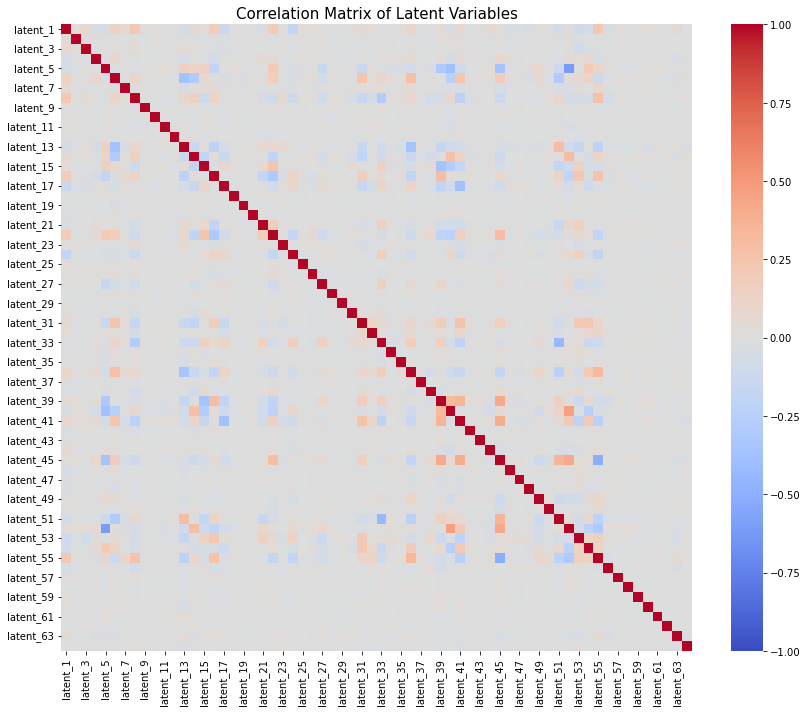

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random
# 读取 CSV 文件
df = pd.read_csv('/home/wcy/data/UKB/eye_feature/feature_data/right_optic_dim64.csv')

# 只提取 latent_1 到 latent_128 列的数据
latent_cols = [f'latent_{i}' for i in range(1, 65)]
latent_df = df[latent_cols]

# 计算相关性矩阵
correlation_matrix = latent_df.corr()

# 初始化一个集合来存储需要删除的列
cols_to_remove = set()

# 循环遍历相关性矩阵
for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1, len(correlation_matrix.columns)):
        # 获取相关性系数 R 值
        corr_value = correlation_matrix.iloc[i, j]
        # 检查是否 R 值大于 0.95
        if abs(corr_value) > 0.5:
            # 随机选择一列进行删除
            col_to_remove = random.choice([correlation_matrix.columns[i], correlation_matrix.columns[j]])
            cols_to_remove.add(col_to_remove)

# 删除显著相关的列
df_dropped = latent_df.drop(columns=cols_to_remove)

# 输出剩下的列
print(f"删除了 {len(cols_to_remove)} 个高度相关的变量: {cols_to_remove}")
print("剩下的列：", df_dropped.columns)

# 设置图形的大小
plt.figure(figsize=(12, 10))

# 使用 Seaborn 绘制相关性矩阵的热图
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1, cbar=True)

# 设置标题
plt.title('Correlation Matrix of Latent Variables', fontsize=15)

# 显示图形
plt.tight_layout()
plt.show()

# 保存处理后的数据
#df_dropped.to_csv('filtered_latents.csv', index=False)


# fastGWA处理
1001为主队列，1002和1003为验证队列

In [3]:
import csv
import os
import numpy as np
import pandas as pd

eye_file = "/home/wcy/data/UKB/eye_feature/feature_data/right_vessel_dim128_new.csv"
save_dir = "/home/wcy/data/UKB/eye_feature/gwas/right_vessel_dim128_new_pheno/"

all_data_file = "/home/wcy/data/UKB/ukb47147.csv"
data_table = "/home/wcy/data/UKB/test_data/0620_gwas/eye_gene/data_table.csv"
pca_file = "/home/wcy/data/UKB/test_data/0620_gwas/eye_gene/imputation/step_3/eye_pca.csv"
disease_file = "/home/wcy/python_code/ICDBioAssign-master/Templates/eye_disease/eye_disease.csv"


if not os.path.exists(save_dir):
    os.makedirs(save_dir)


#读取要提取的列名
with open(data_table,'r',encoding='utf-8-sig') as csvfile: 
    reader = csv.reader(csvfile)
    column1 = [row[0]for row in reader]
    print('提取的列名称：',column1)

disease_data = pd.read_csv(disease_file)

all_data = pd.read_csv(all_data_file, usecols=column1)
all_data=all_data.dropna(axis=0,how='any',subset=column1, inplace=False) 

print('提取前样本数:',all_data.shape[0]) #输出行数
eye_data = pd.read_csv(eye_file,sep=',')
pheno_raw = pd.merge(all_data,eye_data,on='eid')
print('提取后样本数:',pheno_raw.shape[0])
pheno_raw = pd.merge(pheno_raw, disease_data[['eid', 'Retinal', 'Glaucoma']], on='eid')
pheno_raw = pheno_raw[(pheno_raw['Retinal'] != 1) & (pheno_raw['Glaucoma'] != 1)]
print("筛选后的样本数:", pheno_raw.shape[0])
pca = pd.read_csv(pca_file)
r_use = pd.merge(pca,pheno_raw,on='eid')
new_column_name = 'FID'
r_use.insert(0, new_column_name, r_use.iloc[:, 0])
r_use.rename(columns={'eid':'IID'},inplace=True)

qcovar = r_use.loc[:, ['FID','IID','pca1','pca2','pca3','pca4','pca5','pca6','pca7','pca8','pca9','pca10',
                          '21001-0.0','21003-0.0']]

covar = r_use.loc[:, ['FID','IID','31-0.0','20116-0.0','20117-0.0']]


qcovar.to_csv(save_dir + 'qcovar.txt','\t',index=False,header=False)
covar.to_csv(save_dir + "covar.txt",'\t',index=False,header=False)


latent_columns = [f'latent_{i}' for i in range(1, 129)]

# 循环遍历 latent_1 到 latent_128 的列
for eye_column_name in latent_columns:
    # 选择 'FID', 'IID' 和 当前的 latent 列
    pheno = r_use.loc[:, ['FID', 'IID', eye_column_name]]
    
    # 获取最后一列的名称，即当前的 latent 列名
    last_column_name = pheno.columns[-1]
    
    # 构建文件名，例如 latent_1.txt
    file_name = last_column_name + '.txt'
    
    # 保存文件到指定目录
    pheno.to_csv(os.path.join(save_dir, file_name), sep='\t', index=False, header=True)

提取的列名称： ['eid', '31-0.0', '21001-0.0', '21003-0.0', '20116-0.0', '20117-0.0', '21000-0.0']
提取前样本数: 498836
提取后样本数: 40071
筛选后的样本数: 39032


/tmp/ipykernel_3189856/591839531.py:49: FutureWarning: Starting with pandas version 3.0 all arguments of to_csv except for the argument 'path_or_buf' will be keyword-only.
  qcovar.to_csv(save_dir + 'qcovar.txt','\t',index=False,header=False)
/tmp/ipykernel_3189856/591839531.py:50: FutureWarning: Starting with pandas version 3.0 all arguments of to_csv except for the argument 'path_or_buf' will be keyword-only.
  covar.to_csv(save_dir + "covar.txt",'\t',index=False,header=False)


In [1]:
import csv
import os
import numpy as np
import pandas as pd

eye_file = "/home/wcy/data/UKB/eye_feature/feature_data/right_vessel_dim128_new.csv"

all_data_file = "/home/wcy/data/UKB/ukb47147.csv"
data_table = "/home/wcy/data/UKB/test_data/0620_gwas/eye_gene/data_table.csv"
pca_file = "/home/wcy/data/UKB/test_data/0620_gwas/eye_gene/imputation/step_3/eye_pca.csv"
disease_file = "/home/wcy/python_code/ICDBioAssign-master/Templates/eye_disease/eye_disease.csv"



# 读取要提取的列名
with open(data_table, 'r', encoding='utf-8-sig') as csvfile: 
    reader = csv.reader(csvfile)
    column1 = [row[0] for row in reader]
    print('提取的列名称：', column1)

disease_data = pd.read_csv(disease_file)
all_data = pd.read_csv(all_data_file, usecols=column1)
all_data = all_data.dropna(axis=0, how='any', subset=column1, inplace=False) 

print('提取前样本数:', all_data.shape[0])  # 输出行数
eye_data = pd.read_csv(eye_file, sep=',')
pheno_raw = pd.merge(all_data, eye_data, on='eid')
print('提取后样本数:', pheno_raw.shape[0])

# 统计 "21000-0.0" 列中各个值的数量
value_counts = pheno_raw["21000-0.0"].value_counts()
print('21000-0.0 列中的各个值数量：')
print(value_counts)

/usr/local/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/usr/local/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


提取的列名称： ['eid', '31-0.0', '21001-0.0', '21003-0.0', '20116-0.0', '20117-0.0', '21000-0.0']
提取前样本数: 498836
提取后样本数: 40071
21000-0.0 列中的各个值数量：
21000-0.0
 1001.0    33695
 1003.0     1893
 1002.0     1401
 3001.0      589
 4001.0      547
 6.0         520
 4002.0      410
 3004.0      178
-3.0         149
 5.0         141
 3002.0      129
 2004.0      108
 2003.0       91
 2001.0       71
 2002.0       55
 1.0          41
 3003.0       22
-1.0          15
 4003.0        7
 4.0           5
 2.0           4
Name: count, dtype: int64


In [5]:
import csv
import os
import numpy as np
import pandas as pd

# 文件路径
eye_file = "/home/wcy/data/UKB/eye_feature/feature_data/right_vessel_dim128_new.csv"
feature_name = "right_vessel_dim128_pheno"


save_path = "/home/wcy/data/UKB/eye_feature/gwas/main_group/"
validation_path = "/home/wcy/data/UKB/eye_feature/gwas/validation_group/"
all_data_file = "/home/wcy/data/UKB/ukb47147.csv"
data_table = "/home/wcy/data/UKB/test_data/0620_gwas/eye_gene/data_table.csv"
pca_file = "/home/wcy/data/UKB/test_data/0620_gwas/eye_gene/imputation/step_3/eye_pca.csv"
disease_file = "/home/wcy/python_code/ICDBioAssign-master/Templates/eye_disease/eye_disease.csv"

save_dir = save_path + feature_name + "/"
validation_dir = validation_path + feature_name + "/"


# 创建保存目录
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

if not os.path.exists(validation_dir):
    os.makedirs(validation_dir)

# 读取要提取的列名
with open(data_table, 'r', encoding='utf-8-sig') as csvfile: 
    reader = csv.reader(csvfile)
    column1 = [row[0] for row in reader]
    print('提取的列名称：', column1)

disease_data = pd.read_csv(disease_file)
all_data = pd.read_csv(all_data_file, usecols=column1)
all_data = all_data.dropna(axis=0, how='any', subset=column1, inplace=False) 

print('提取前样本数:', all_data.shape[0])
eye_data = pd.read_csv(eye_file, sep=',')
pheno_raw = pd.merge(all_data, eye_data, on='eid')
print('提取后样本数:', pheno_raw.shape[0])

# 筛选掉 Retinal 和 Glaucoma 为 1 的数据
pheno_raw = pd.merge(pheno_raw, disease_data[['eid', 'Retinal', 'Glaucoma']], on='eid')
pheno_raw = pheno_raw[(pheno_raw['Retinal'] != 1) & (pheno_raw['Glaucoma'] != 1)]
print("筛选后的样本数:", pheno_raw.shape[0])

# 按照 "21000-0.0" 列进行数据分割
main_cohort = pheno_raw[pheno_raw['21000-0.0'] == 1001]
validation_cohort = pheno_raw[pheno_raw['21000-0.0'].isin([1002, 1003])]

# 处理 PCA 数据并合并到主队列和验证队列
pca = pd.read_csv(pca_file)

# 主队列处理
main_use = pd.merge(pca, main_cohort, on='eid')
main_use.insert(0, 'FID', main_use.iloc[:, 0])
main_use.rename(columns={'eid': 'IID'}, inplace=True)

# 验证队列处理
validation_use = pd.merge(pca, validation_cohort, on='eid')
validation_use.insert(0, 'FID', validation_use.iloc[:, 0])
validation_use.rename(columns={'eid': 'IID'}, inplace=True)

# 定量协变量（qcovar）和分类协变量（covar）的保存函数
def save_covariates(data, folder):
    qcovar = data.loc[:, ['FID', 'IID', 'pca1', 'pca2', 'pca3', 'pca4', 'pca5', 'pca6', 'pca7', 'pca8', 'pca9', 'pca10',
                          '21001-0.0', '21003-0.0']]
    covar = data.loc[:, ['FID', 'IID', '31-0.0', '20116-0.0', '20117-0.0']]
    qcovar.to_csv(os.path.join(folder, 'qcovar.txt'), sep='\t', index=False, header=False)
    covar.to_csv(os.path.join(folder, 'covar.txt'), sep='\t', index=False, header=False)

# 保存主队列的协变量
save_covariates(main_use, save_dir)

# 保存验证队列的协变量
save_covariates(validation_use, validation_dir)

# 保存潜在特征数据
def save_latent_features(data, folder):
    latent_columns = [f'latent_{i}' for i in range(1, 129)]
    for eye_column_name in latent_columns:
        pheno = data.loc[:, ['FID', 'IID', eye_column_name]]
        file_name = eye_column_name + '.txt'
        pheno.to_csv(os.path.join(folder, file_name), sep='\t', index=False, header=True)

# 保存主队列的潜在特征
save_latent_features(main_use, save_dir)

# 保存验证队列的潜在特征
save_latent_features(validation_use, validation_dir)


提取的列名称： ['eid', '31-0.0', '21001-0.0', '21003-0.0', '20116-0.0', '20117-0.0', '21000-0.0']
提取前样本数: 498836
提取后样本数: 40071
筛选后的样本数: 39032


# UMAP可视化

In [3]:
import csv
import os
import numpy as np
import pandas as pd

eye_file = "/home/wcy/data/UKB/eye_feature/feature_data/right_vessel_dim128_new.csv"
save_dir = "/home/wcy/data/UKB/eye_feature/gwas/right_vessel_dim128_new_pheno/"

all_data_file = "/home/wcy/data/UKB/ukb47147.csv"
data_table = "/home/wcy/data/UKB/test_data/0620_gwas/eye_gene/data_table.csv"
pca_file = "/home/wcy/data/UKB/test_data/0620_gwas/eye_gene/imputation/step_3/eye_pca.csv"
disease_file = "/home/wcy/python_code/ICDBioAssign-master/Templates/eye_disease/eye_disease.csv"




#读取要提取的列名
with open(data_table,'r',encoding='utf-8-sig') as csvfile: 
    reader = csv.reader(csvfile)
    column1 = [row[0]for row in reader]
    print('提取的列名称：',column1)

disease_data = pd.read_csv(disease_file)

all_data = pd.read_csv(all_data_file, usecols=column1)
all_data=all_data.dropna(axis=0,how='any',subset=column1, inplace=False) 

print('提取前样本数:',all_data.shape[0]) #输出行数
eye_data = pd.read_csv(eye_file,sep=',')
pheno_raw = pd.merge(all_data,eye_data,on='eid')
print('提取后样本数:',pheno_raw.shape[0])
pheno_raw = pd.merge(pheno_raw, disease_data[['eid', 'Retinal', 'Glaucoma']], on='eid')

print(pheno_raw)

提取的列名称： ['eid', '31-0.0', '21001-0.0', '21003-0.0', '20116-0.0', '20117-0.0', '21000-0.0']
提取前样本数: 498836
提取后样本数: 40071
           eid  31-0.0  20116-0.0  20117-0.0  21000-0.0  21001-0.0  21003-0.0  \
0      1000123     0.0        1.0        2.0     1003.0    22.1104       48.0   
1      1000140     1.0        0.0        2.0     1001.0    24.1115       43.0   
2      1000256     0.0        0.0        2.0     1001.0    25.8773       43.0   
3      1000327     1.0        0.0        2.0     1001.0    27.7117       49.0   
4      1000416     0.0        0.0        2.0     1001.0    30.2510       47.0   
...        ...     ...        ...        ...        ...        ...        ...   
40066  6007501     1.0        0.0        2.0     1001.0    32.8973       41.0   
40067  6007892     1.0        0.0        2.0     1001.0    28.6694       49.0   
40068  6007932     1.0        0.0        2.0     1001.0    21.5184       63.0   
40069  6008052     1.0        0.0        1.0     1001.0    24.5935    

/home/wcy/micromamba/envs/mmc2/lib/python3.7/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


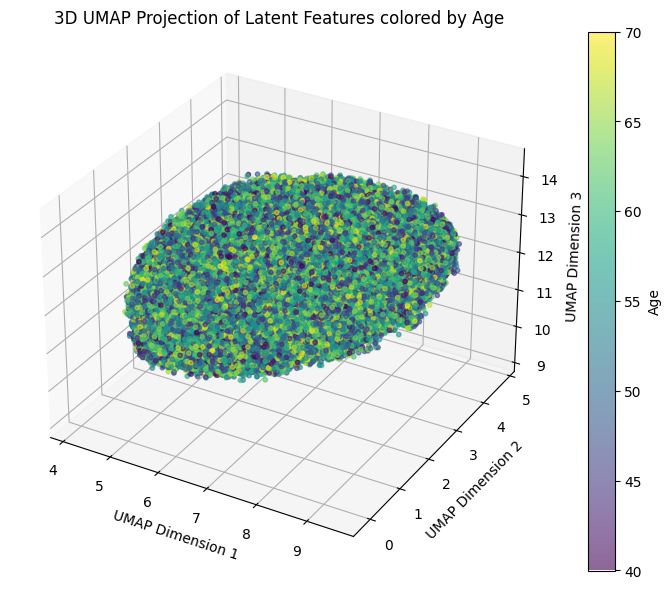

In [11]:
import umap
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from matplotlib.animation import FuncAnimation

# 提取 latent1 到 latent128 列的数据
latent_columns = [f'latent_{i}' for i in range(1, 129)]
latent_data = pheno_raw[latent_columns].values  # 提取数据，n*128 的格式

# 提取 Age 列作为着色标签
age_labels = pheno_raw['21003-0.0'].values  # 提取 age 列的数据

# 初始化 UMAP，设置为 3D 降维
reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=3, random_state=42)

# 执行 UMAP 3D 降维
embedding = reducer.fit_transform(latent_data)  # n*3 的降维结果

# 可视化 3D UMAP 结果，使用 Age 的值着色
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# 绘制 3D 散点图
scatter = ax.scatter(embedding[:, 0], embedding[:, 1], embedding[:, 2], c=age_labels, cmap='viridis', s=10, alpha=0.6)

# 添加图形标题和标签
ax.set_title('3D UMAP Projection of Latent Features colored by Age')
ax.set_xlabel('UMAP Dimension 1')
ax.set_ylabel('UMAP Dimension 2')
ax.set_zlabel('UMAP Dimension 3')

# 添加颜色条，显示 Age 范围
cbar = fig.colorbar(scatter, ax=ax, label='Age')

# 定义旋转动画的函数
def rotate(angle):
    ax.view_init(azim=angle)

# 创建动画，每帧调用 rotate 函数，范围为 0 到 360 度
ani = FuncAnimation(fig, rotate, frames=np.arange(0, 360, 2), interval=100)

# 显示动画
plt.show()

# 如果想保存动画为 GIF 文件，使用以下代码：
# ani.save('umap_rotation.gif', writer='imagemagick')


# 求平均maf

In [4]:
import os
import pandas as pd
from tqdm import tqdm
import gc
# 设置包含TXT文件的目录
directory = "/home/wcy/data/UKB/eye_feature/gwas/right_vessel_dim128_result/"
output_folder = "/home/wcy/data/UKB/eye_feature/cgwas/right_vessel_dim128/"

# 初始化一个空的DataFrame来存储所有文件的MAF列
combined_maf_df = pd.DataFrame()

# 遍历目录中的每个TXT文件
for filename in tqdm(os.listdir(directory)):
    if filename.endswith('.fastGWA'):
        filepath = os.path.join(directory, filename)

        # 读取文件内容到DataFrame
        df = pd.read_csv(filepath, sep='\t')

        # 确保MAF列存在
        if 'AF1' in df.columns:
            # 将MAF列添加到combined_maf_df
            combined_maf_df = pd.concat([combined_maf_df, df[['AF1']]], ignore_index=True,axis=1)
        else:
            print(f"AF1列在文件{filename}中不存在")

        del df
        gc.collect()
# 计算合并后的MAF列的每行均值
combined_maf_df['MAF'] = combined_maf_df.mean(axis=1)

# 输出结果
# 保存Mean列到CSV文件
combined_maf_df[['MAF']].to_csv(output_folder + 'maf_mean_values.csv', index=False)

100%|██████████| 255/255 [28:35<00:00,  6.73s/it]


# 生成snp列表

In [ ]:
import csv
import os
import numpy as np
import pandas as pd
from tqdm import tqdm

input_folder = "/home/wcy/data/UKB/eye_feature/gwas/right_vessel_dim128_result/"
output_folder = "/home/wcy/data/UKB/eye_feature/cgwas/right_vessel_dim128/"

column2 = ['CHR','POS','SNP']

gwas_files = [f for f in os.listdir(input_folder) if f.endswith('.fastGWA')]

gwas = pd.read_csv(input_folder+"latent_1.fastGWA",sep='\t',usecols=column2)

cols = gwas.columns.tolist()                     
cols.insert(3, cols.pop(cols.index('SNP')))
gwas_final = gwas[cols]

gwas_final.to_csv(output_folder + "snp_list.csv",sep='\t',index=False, header=True)

# 生成CGWAS格式

In [3]:
import csv
import os
import numpy as np
import pandas as pd
from tqdm import tqdm
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

input_folder = "/home/wcy/data/UKB/eye_feature/gwas/right_vessel_dim128_new_result/"
output_folder = "/home/wcy/data/UKB/eye_feature/cgwas/right_vessel_dim128_new/"

column2 = ['BETA','P']

gwas_files = [f for f in os.listdir(input_folder) if f.endswith('.fastGWA')]

for gwas_file in tqdm(gwas_files):
    target = gwas_file.replace('.fastGWA', '.assoc')
    input_path = os.path.join(input_folder, gwas_file)
    output_path = os.path.join(output_folder, target)

    gwas = pd.read_csv(input_path,sep = '\t',usecols=column2)
    gwas.to_csv(output_path,'\t',index=False, header=True)

100%|██████████| 127/127 [22:31<00:00, 10.64s/it]


In [3]:
import os

# 设置包含TXT文件的目录
directory = '/home/wcy/data/UKB/eye_feature/cgwas/main_group/left_optic_dim64_result/'

# 获取目录中所有文件的列表
files = [f for f in os.listdir(directory) if f.endswith('.assoc')]
names = [f[:-6] for f in os.listdir(directory) if f.endswith('.assoc')]
# 对文件进行排序，以保证输出顺序
files.sort()
names.sort()
# 用逗号连接文件名
files_str = ', '.join([f'"{file}"' for file in files])
names_str = ', '.join([f'"{name}"' for name in names])
# 输出文件名字符串
print(files_str)
print(names_str)

"latent_1.assoc", "latent_10.assoc", "latent_11.assoc", "latent_12.assoc", "latent_13.assoc", "latent_14.assoc", "latent_15.assoc", "latent_16.assoc", "latent_17.assoc", "latent_18.assoc", "latent_19.assoc", "latent_2.assoc", "latent_20.assoc", "latent_21.assoc", "latent_22.assoc", "latent_23.assoc", "latent_24.assoc", "latent_25.assoc", "latent_26.assoc", "latent_27.assoc", "latent_28.assoc", "latent_29.assoc", "latent_3.assoc", "latent_30.assoc", "latent_31.assoc", "latent_32.assoc", "latent_33.assoc", "latent_34.assoc", "latent_35.assoc", "latent_36.assoc", "latent_37.assoc", "latent_38.assoc", "latent_39.assoc", "latent_4.assoc", "latent_40.assoc", "latent_41.assoc", "latent_42.assoc", "latent_43.assoc", "latent_44.assoc", "latent_45.assoc", "latent_46.assoc", "latent_47.assoc", "latent_48.assoc", "latent_49.assoc", "latent_5.assoc", "latent_50.assoc", "latent_51.assoc", "latent_52.assoc", "latent_53.assoc", "latent_54.assoc", "latent_55.assoc", "latent_56.assoc", "latent_57.assoc"

# CGWAS后处理

In [ ]:
import csv
import os
import numpy as np
import pandas as pd
import argparse

parser = argparse.ArgumentParser(description='Process images')

# 添加需要解析的参数
parser.add_argument('--cgwas_file', type=str, required=True, help='path to the cgwas summary')
parser.add_argument('--save_path', type=str, required=True, help='path to the cgwas processed data')


# 解析命令行参数
args = parser.parse_args()


gwas_file = "/home/wcy/data/UKB/vessel/carotid_gwas/gwas_result/22681.fastGWA"
cgwas_file = args.cgwas_file
save_path = args.save_path

gwas_result = pd.read_csv(gwas_file,'\t')
cgwas_result = pd.read_csv(cgwas_file,' ')

cgwas_result =  cgwas_result.drop(['V1','C-GWASadjustedP','MinGWASadjustedP', 'MinGWASrawP'], axis=1)
gwas_result =  gwas_result.drop(['CHR','POS','P'], axis=1)
cgwas_result = pd.merge(cgwas_result,gwas_result,on='SNP')

cgwas_result.to_csv(save_path,'\t',index=False, header=True)

# CGWAS可视化

In [ ]:
import gwaslab as gl
import pandas as pd
# load plink2 output

#读取输入文件
insumstats = pd.read_csv("/haizhu_data_8T/UKB/heart_mri/gwas_result/cgwas_reault/C-GWAS_combine.txt","\t")

mysumstats = gl.Sumstats(insumstats,
             rsid="SNP",
             chrom="CHR",
             pos="BP",
             beta="BETA",
             p="C-GWASrawP",
             n="N",
             ea="A1",
             nea="A2",
             eaf="AF1",
             se="SE",
             build="19")

#mysumstats.plot_mqq(save="/home/wcy/data/UKB/test_data/eye_gwas/fastgwa_result/plot/mplot/c-gwas.png",mode = "m",anno=True, anno_style="right", mtitle ="C-GWAS Result",sig_level_lead=5e-8)
#mysumstats.plot_mqq(save="/home/wcy/data/UKB/test_data/eye_gwas/fastgwa_result/plot/qqplot/c-gwas.png",mode = "qq", qtitle ="C-GWAS Result",figargs= {"figsize":(5,5),"dpi":300})
mysumstats.plot_mqq()

# 典型相关分析

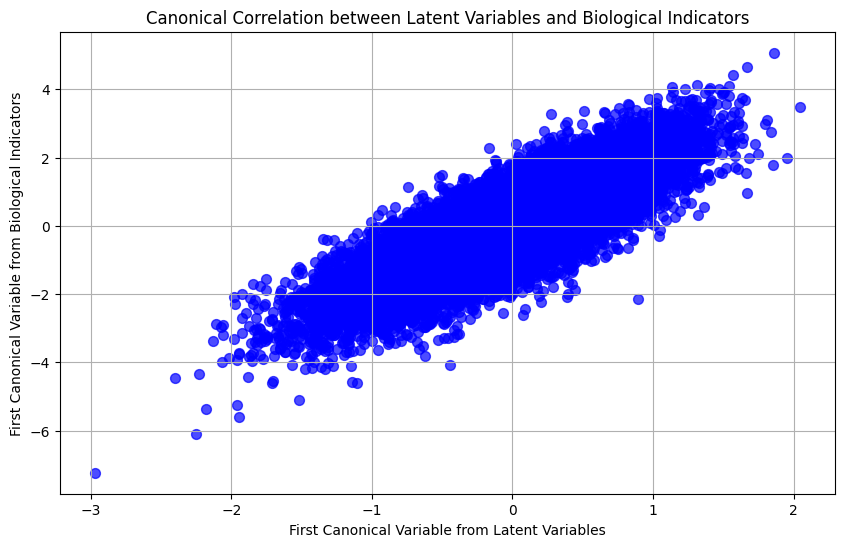

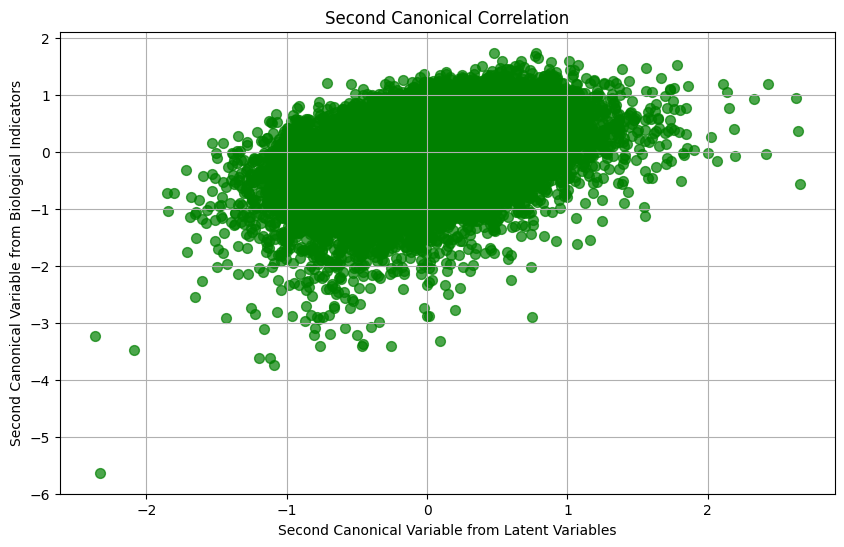

Canonical Correlations: [[ 8.38341428e-01 -2.55408918e-16]
 [-1.74544484e-04  4.26877595e-01]]


In [2]:
import pandas as pd
from sklearn.cross_decomposition import CCA
import matplotlib.pyplot as plt
import numpy as np


feature_data = pd.read_csv("/home/wcy/data/UKB/eye_feature/feature_data/left_vessel_dim128.csv")
eye_data = pd.read_csv("/home/wcy/data/UKB/test_data/eye_gwas/merge_data.csv")

df = pd.merge(feature_data,eye_data,on='eid')


# 提取 latent1-128 列
latent_columns = [f'latent_{i}' for i in range(1, 129)]
X = df[latent_columns].values  # n * 128 维矩阵

# 提取目标变量列
target_columns = [
    'CDR_horizontal', 'Artery_Fractal_dimension', 'Artery_Vessel_density', 'Artery_Average_width',
    'Artery_Distance_tortuosity', 'Artery_Squared_curvature_tortuosity', 'Artery_Tortuosity_density',
    'Vein_Fractal_dimension', 'Vein_Vessel_density', 'Vein_Average_width', 'Vein_Distance_tortuosity',
    'Vein_Squared_curvature_tortuosity', 'Vein_Tortuosity_density', 'CDR_vertical'
]
Y = df[target_columns].values  # n * m 维矩阵

# 定义典型相关分析模型
n_components = 2  # 设置提取前两个典型变量
cca = CCA(n_components=n_components)

# 拟合模型
cca.fit(X, Y)

# 变换 X 和 Y
X_c, Y_c = cca.transform(X, Y)

# 可视化第一个典型变量对的相关性
plt.figure(figsize=(10, 6))
plt.scatter(X_c[:, 0], Y_c[:, 0], c='blue', s=50, alpha=0.7)
plt.xlabel('First Canonical Variable from Latent Variables')
plt.ylabel('First Canonical Variable from Biological Indicators')
plt.title('Canonical Correlation between Latent Variables and Biological Indicators')
plt.grid(True)
plt.show()

# 可视化第二个典型变量对的相关性
plt.figure(figsize=(10, 6))
plt.scatter(X_c[:, 1], Y_c[:, 1], c='green', s=50, alpha=0.7)
plt.xlabel('Second Canonical Variable from Latent Variables')
plt.ylabel('Second Canonical Variable from Biological Indicators')
plt.title('Second Canonical Correlation')
plt.grid(True)
plt.show()

# 输出典型相关系数
canonical_corr = np.corrcoef(X_c.T, Y_c.T)[:n_components, n_components:]
print(f'Canonical Correlations: {canonical_corr}')


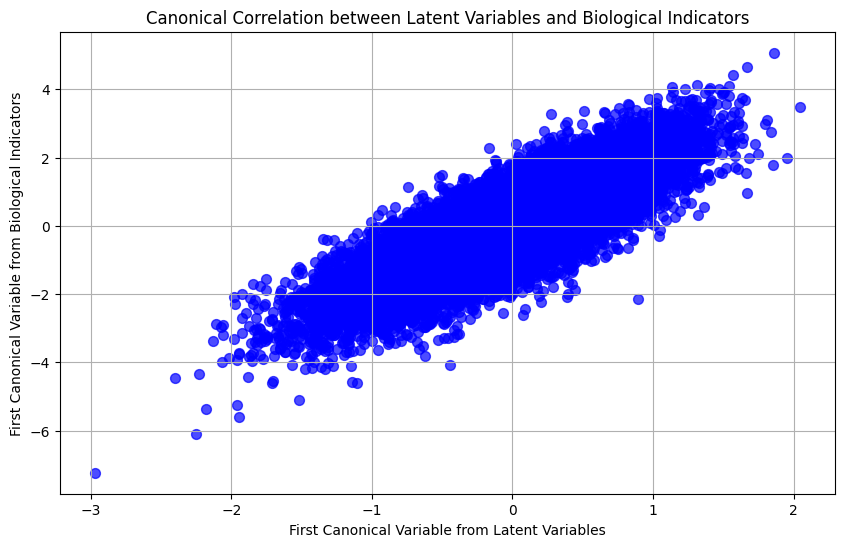

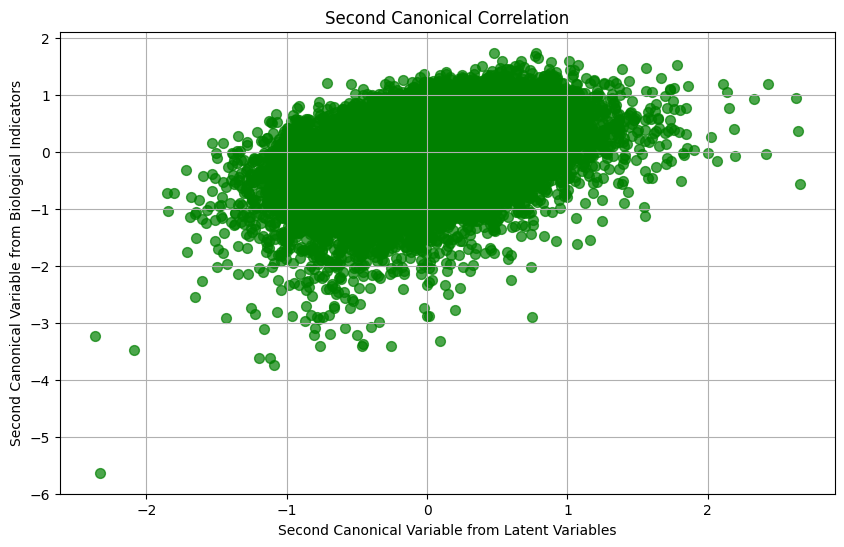

Canonical Correlations: [[ 8.38341428e-01 -7.35286850e-16]
 [-1.74544484e-04  4.26877595e-01]]

Detailed Canonical Correlation Results:
Canonical Variable Pair 1:
  Latent Variables (X) Canonical Weights:
[-9.21077275e-02  1.85769320e-01  1.80639899e-02  1.97683840e-02
  9.58761824e-05  3.63789481e-02 -2.76008300e-02  1.15553357e-02
 -3.53993625e-02  8.68586092e-02  8.73903195e-03 -6.57133051e-02
  1.51760705e-01  1.42843141e-01  9.77874565e-02  1.81004195e-03
 -1.97304166e-02  3.81108363e-02  3.66607608e-02 -8.29771052e-02
  8.39129610e-02 -1.88704355e-01  7.34381087e-02 -7.73596820e-02
 -3.53045361e-02  6.26091365e-02  7.66898464e-02 -1.17446283e-01
  8.66538396e-02  9.72072962e-02 -5.09081676e-02 -1.00467969e-01
 -1.54446079e-01  2.23309591e-02 -7.60937786e-02  9.47717430e-02
 -9.13262054e-02 -3.43596075e-02  2.24037118e-02  2.77930769e-02
  8.59966085e-02 -3.00406918e-01  6.74249786e-02  1.00914328e-01
 -2.65172847e-02  1.10220972e-01  6.85518245e-02  3.78459706e-02
  6.48540859e-0

In [2]:
import pandas as pd
from sklearn.cross_decomposition import CCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

# 读取数据
feature_data = pd.read_csv("/home/wcy/data/UKB/eye_feature/feature_data/left_vessel_dim128.csv")
eye_data = pd.read_csv("/home/wcy/data/UKB/test_data/eye_gwas/merge_data.csv")

# 合并数据
df = pd.merge(feature_data, eye_data, on='eid')

# 提取 latent1-128 列
latent_columns = [f'latent_{i}' for i in range(1, 129)]
X = df[latent_columns].values  # n * 128 维矩阵

# 提取目标变量列
target_columns = [
    'CDR_horizontal', 'Artery_Fractal_dimension', 'Artery_Vessel_density', 'Artery_Average_width',
    'Artery_Distance_tortuosity', 'Artery_Squared_curvature_tortuosity', 'Artery_Tortuosity_density',
    'Vein_Fractal_dimension', 'Vein_Vessel_density', 'Vein_Average_width', 'Vein_Distance_tortuosity',
    'Vein_Squared_curvature_tortuosity', 'Vein_Tortuosity_density', 'CDR_vertical'
]
Y = df[target_columns].values  # n * m 维矩阵

# 对 X 和 Y 进行标准化
scaler_X = StandardScaler()
scaler_Y = StandardScaler()

X_scaled = scaler_X.fit_transform(X)  # 标准化 latent variables
Y_scaled = scaler_Y.fit_transform(Y)  # 标准化 biological indicators

# 定义典型相关分析模型
n_components = 2  # 设置提取前两个典型变量
cca = CCA(n_components=n_components)

# 拟合模型
cca.fit(X_scaled, Y_scaled)

# 变换 X 和 Y
X_c, Y_c = cca.transform(X_scaled, Y_scaled)

# 可视化第一个典型变量对的相关性
plt.figure(figsize=(10, 6))
plt.scatter(X_c[:, 0], Y_c[:, 0], c='blue', s=50, alpha=0.7)
plt.xlabel('First Canonical Variable from Latent Variables')
plt.ylabel('First Canonical Variable from Biological Indicators')
plt.title('Canonical Correlation between Latent Variables and Biological Indicators')
plt.grid(True)
plt.show()

# 可视化第二个典型变量对的相关性
plt.figure(figsize=(10, 6))
plt.scatter(X_c[:, 1], Y_c[:, 1], c='green', s=50, alpha=0.7)
plt.xlabel('Second Canonical Variable from Latent Variables')
plt.ylabel('Second Canonical Variable from Biological Indicators')
plt.title('Second Canonical Correlation')
plt.grid(True)
plt.show()

# 输出典型相关系数
canonical_corr = np.corrcoef(X_c.T, Y_c.T)[:n_components, n_components:]
print(f'Canonical Correlations: {canonical_corr}')

# 输出每个典型变量对的详细结果
print("\nDetailed Canonical Correlation Results:")
for i in range(n_components):
    print(f"Canonical Variable Pair {i+1}:")
    print(f"  Latent Variables (X) Canonical Weights:\n{cca.x_weights_[:, i]}")
    print(f"  Biological Indicators (Y) Canonical Weights:\n{cca.y_weights_[:, i]}")
    print(f"  Correlation: {canonical_corr[i]}")
    print()

# 计算每个典型变量对的贡献率
X_var_explained = np.var(X_c, axis=0) / np.var(X_scaled, axis=0).sum()
Y_var_explained = np.var(Y_c, axis=0) / np.var(Y_scaled, axis=0).sum()

print(f"Variance Explained by Canonical Variables in X: {X_var_explained}")
print(f"Variance Explained by Canonical Variables in Y: {Y_var_explained}")



# 生成关联对

In [8]:
import os
import csv

# 定义文件夹路径
folder_a = '/home/wcy/data/UKB/eye_feature/gwas/main_group/right_vessel_dim128_pheno_result/ldsc/'
folder_b = '/home/wcy/data/UKB/test_data/eye_gwas/ldsc_data/'
output_csv = '/home/wcy/data/UKB/eye_feature/disease_cor/cor_eye_gwas/right_vessel_dim128_cor.csv'

# 获取文件夹中的 .sumstats.gz 文件列表
files_a = [f for f in os.listdir(folder_a) if f.endswith('.sumstats.gz')]
files_b = [f for f in os.listdir(folder_b) if f.endswith('.sumstats.gz')]

# 创建 CSV 文件并写入组合
with open(output_csv, 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['Var1', 'Var2'])  # 添加CSV的表头

    # 遍历文件夹 a 和 b 中的文件进行两两组合
    for file_a in files_a:
        for file_b in files_b:
            writer.writerow([file_a, file_b])

print(f'File combinations written to {output_csv}')


File combinations written to /home/wcy/data/UKB/eye_feature/disease_cor/cor_eye_gwas/right_vessel_dim128_cor.csv


# 计算遗传力

In [ ]:
import csv
import os
import numpy as np
import pandas as pd

cor_path = "/home/wcy/data/UKB/eye_feature/disease_cor/cor_eye_gwas/test_file/file_list.csv"
ldsc_path = "/home/wcy/data/UKB/eye_feature/disease_cor/cor_eye_gwas/test_file/"

result_path = "/home/wcy/data/UKB/eye_feature/disease_cor/cor_eye_gwas/test_file/"

ref_path = "/home/wcy/python_code/ldsc/tool_data/eur_w_ld_chr/"
w_path = "/home/wcy/python_code/ldsc/tool_data/eur_w_ld_chr/"

cor_file = pd.read_csv(cor_path,sep=',')

for index, row in cor_file.iterrows():
    faeture_name = row['feature_name']
    
    file_name = ldsc_path + faeture_name
    
    

    # 去掉后缀
    faeture_name_base = os.path.splitext(os.path.splitext(faeture_name)[0])[0]  # 去掉 .sumstats.gz  # 去掉 .sumstats.gz
    result_name = result_path + faeture_name_base

    cmd = f"~/python_code/ldsc/ldsc.py --out {result_name} --h2 {file_name} --ref-ld-chr {ref_path} --w-ld-chr {ref_path}"
    os.system(cmd)

    with open(result_name+'.log', "r") as file:
        lines = file.readlines()
    
    h2 = None
    h2_se =None
    Lambda = None
    Intercept = None
    Intercept_se = None


    # 遍历每一行并查找目标值
    for line in lines:
        if line.startswith("Total Observed scale h2"):
            h2_raw = line.split(":")[1].strip()
            h2 = h2_raw.split(" ")[0].strip()
            h2_se = h2_raw.split(" ")[1].strip()
            h2_se = h2_se.replace("(", "").replace(")", "")
        elif line.startswith("Lambda GC"):
            Lambda = line.split(":")[1].strip()
        elif line.startswith("Intercept"):
            Intercept_raw = line.split(":")[1].strip()
            Intercept = Intercept_raw.split(" ")[0].strip()
            Intercept_se = Intercept_raw.split(" ")[1].strip()
            Intercept_se = Intercept_se.replace("(", "").replace(")", "")
    
    cor_file.at[index, 'h2'] = h2
    cor_file.at[index, 'h2_se'] = h2_se
    cor_file.at[index, 'Lambda'] = Lambda
    cor_file.at[index, 'Intercept'] = Intercept
    cor_file.at[index, 'Intercept_se'] = Intercept_se


cor_file.to_csv(result_path + "h2.csv",'\t',index=False, header=True)
       

# 遗传力可视化

<Figure size 1440x576 with 0 Axes>

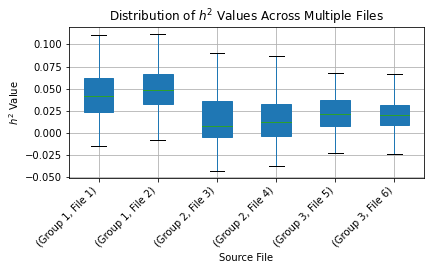

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# 文件列表
file_paths = [
    '/home/wcy/data/UKB/eye_feature/disease_cor/h2_result/left_flitter_dim64/h2.csv', 
    '/home/wcy/data/UKB/eye_feature/disease_cor/h2_result/right_flitter_dim64/h2.csv', 
    '/home/wcy/data/UKB/eye_feature/disease_cor/h2_result/left_optic_dim64/h2.csv', 
    '/home/wcy/data/UKB/eye_feature/disease_cor/h2_result/right_optic_dim64/h2.csv', 
    '/home/wcy/data/UKB/eye_feature/disease_cor/h2_result/left_vessel_dim128/h2.csv', 
    '/home/wcy/data/UKB/eye_feature/disease_cor/h2_result/right_vessel_dim128/h2.csv'
]

# 创建空的 DataFrame 列表
data_frames = []
groups = ['Group 1', 'Group 1', 'Group 2', 'Group 2', 'Group 3', 'Group 3']

# 依次读取每个文件并提取 `h2` 列
for i, file_path in enumerate(file_paths):
    df = pd.read_csv(file_path, sep='\t')  # 确保分隔符正确
    df['Source'] = f'File {i+1}'
    df['Group'] = groups[i]  # 添加每个文件的组别
    data_frames.append(df[['h2', 'Source', 'Group']])

# 将所有数据合并到一个 DataFrame
combined_df = pd.concat(data_frames, ignore_index=True)

# 设置不同组的颜色
group_colors = {'Group 1': 'lightblue', 'Group 2': 'lightgreen', 'Group 3': 'lightcoral'}

# 拉宽图像并绘制多组箱图
plt.figure(figsize=(20, 8))  # 扩展宽度
boxplot = combined_df.boxplot(column='h2', by=['Group', 'Source'], grid=True, showfliers=False, patch_artist=True)

# 迭代箱体并根据组别上色
for i, (box, group) in enumerate(zip(boxplot.artists, combined_df['Group'].unique())):
    box.set_facecolor(group_colors[group]) 

# 设置标题和标签
plt.title('Distribution of $h^2$ Values Across Multiple Files')
plt.suptitle('')  # 删除默认的标题
plt.xlabel('Source File')
plt.ylabel('$h^2$ Value')

# 调整 x 轴标签以防止重叠
plt.xticks(rotation=45, ha='right')  # 旋转 x 轴标签并右对齐

# 显示图像
plt.tight_layout()  # 自动调整布局以适应扩展的宽度
plt.show()


# 遗传相关性可视化

In [7]:
import os

# 输入文件夹路径
log_folder = "/home/wcy/data/UKB/eye_feature/disease_cor/cor_eye_gwas/left_vessel_dim128_cor/"
output_file = "/home/wcy/data/UKB/eye_feature/disease_cor/cor_eye_gwas/left_vessel_dim128_cor/log_files.txt"

# 打开输出文件
with open(output_file, "w") as output:
    # 遍历文件夹中的所有文件
    for root, dirs, files in os.walk(log_folder):
        for file in files:
            # 仅处理 .log 文件
            if file.endswith(".log"):
                file_path = os.path.join(root, file)
                try:
                    with open(file_path, "r") as log_file:
                        # 检查文件内容是否包含 'Genetic Correlation:'
                        for line in log_file:
                            if "Genetic Correlation:" in line:
                                # 提取内容并检查是否为 'nan'
                                correlation_value = line.split("Genetic Correlation:")[1].strip().split()[0]
                                print(correlation_value)
                                if correlation_value.lower() != "nan":
                                    # 如果不是 'nan'，将绝对路径写入输出文件
                                    output.write(file_path + "\n")
                                    break  # 已找到，跳出内层循环
                except Exception as e:
                    print(f"Error reading file {file_path}: {e}")

print(f"Filtered file paths saved to {output_file}")


nan
0.3255
-0.0002
-0.0167
nan
-0.3019
nan
nan
nan
-0.0948
-0.0988
0.0554
-0.068
nan
-0.0472
-0.1144
nan
nan
nan
0.7564
0.4061
0.3758
0.68
-0.0003
-0.1041
0.0379
0.0377
-0.6989
0.2705
0.5648
nan
-0.3299
nan
0.5561
nan
-0.0096
nan
-0.4896
0.0361
0.1378
nan
-0.196
nan
nan
0.5601
-0.327
0.1973
-0.1754
nan
nan
-0.0438
0.097
nan
-0.0766
-1.0704
-0.3008
0.2938
0.1738
nan
-0.2831
0.3351
-0.3233
0.0857
0.6654
-0.0118
0.6678
-0.3685
nan
-0.6483
-0.0453
-0.2183
0.0571
0.0584
0.0061
nan
nan
0.1224
0.084
nan
nan
0.566
nan
0.6264
nan
-0.2607
nan
-0.0858
-0.1234
-0.6595
-1.173
-0.3691
nan
-0.492
nan
0.3798
-0.5351
-0.2544
0.3195
0.3937
0.0912
-0.0334
0.2166
nan
0.4066
0.3014
-0.2655
nan
0.1749
0.1142
-0.1625
nan
-0.0339
-0.3883
0.2348
-0.1479
-0.5671
nan
nan
nan
nan
nan
nan
0.1207
-0.8229
-0.625
-0.226
0.0492
0.124
-1.0437
nan
-0.0339
-0.3679
-0.8775
0.4059
-0.0038
nan
-0.474
0.2239
0.3225
1.1281
-0.7113
1.0517
0.5272
-0.1881
nan
0.1065
-0.1445
-0.0318
-0.1469
-0.0473
0.1425
-0.0585
-0.2081
nan
nan


# loci计算

In [2]:
import gwaslab as gl
import pandas as pd

mysumstats = gl.Sumstats("/home/wcy/data/UKB/eye_feature/gwas/main_group/left_flitter_dim64_pheno_result/latent_10.fastGWA",
             snpid="SNP",
             chrom="CHR",
             pos="POS",
             ea="A1",
             nea="A2",            
             n= "N",
             p="P", 
             build="19",
             verbose=False)
loci = mysumstats.get_lead(anno=True)
loci
#loci.to_csv("/home/wcy/data/UKB/eye_feature/disease_cor/loci_file/left_vessel_dim128_pheno_result_loci.txt")

2024/12/14 11:14:28 Start to extract lead variants...v3.5.1
2024/12/14 11:14:28  -Current Dataframe shape : 5261210 x 8 ; Memory usage: 262.91 MB
2024/12/14 11:14:28  -Processing 5261210 variants...
2024/12/14 11:14:28  -Significance threshold : 5e-08
2024/12/14 11:14:28  -Sliding window size: 500  kb
2024/12/14 11:14:32  -Using P for extracting lead variants...
2024/12/14 11:14:32  -Found 0 significant variants in total...
2024/12/14 11:14:33  -Identified 0 lead variants!
2024/12/14 11:14:33 Finished extracting lead variants.


,SNPID,CHR,POS,EA,NEA,P,N,STATUS


In [22]:
import gwaslab as gl
import pandas as pd
gwas_data =pd.read_csv("/home/wcy/data/UKB/eye_feature/disease_cor/loci_file/left_optic_dim64_pheno_result_loci.txt",sep=",")
mysumstats = gl.Sumstats(gwas_data,
             snpid="SNPID",
             chrom="CHR",
             pos="POS",
             ea="EA",
             nea="NEA",
             n="N",
             status="STATUS",
             p="P", 
             build="19",
             verbose=False)
mysumstats.basic_check(verbose=False)

Sat Nov 23 23:27:16 2024 GWASLab version 3.4.15 https://cloufield.github.io/gwaslab/
Sat Nov 23 23:27:16 2024 (C) 2022-2023, Yunye He, Kamatani Lab, MIT License, gwaslab@gmail.com


/usr/local/anaconda3/lib/python3.9/site-packages/gwaslab/fixdata.py:458: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '<IntegerArray>
[ 1,  1,  1,  1,  2,  2,  2,  2,  3,  3,  4,  5,  6,  6,  8,  8,  9, 10, 11,
 11, 11, 11, 12, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 16, 16, 17, 18,
 18, 22, 22, 22]
Length: 42, dtype: Int64' has dtype incompatible with string, please explicitly cast to a compatible dtype first.
  sumstats.loc[:,chrom] = sumstats.loc[:,chrom].astype('Int64')
/usr/local/anaconda3/lib/python3.9/site-packages/gwaslab/fixdata.py:528: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['T', 'G', 'T', 'G', 'T', ..., 'G', 'C', 'A', 'T', 'T']
Length: 42
Categories (6, object): ['T', 'A', 'C', 'N', 'CA', 'G']' has dtype incompatible with category, please explicitly cast to a compatible dtype first.
  sumstats.loc[:,ea]=pd.Categorical(sums

In [26]:
mysumstats.data["CHR"] = mysumstats.data["CHR"].astype(str).str.replace("chr", "").astype(int)
mysumstats.liftover(n_cores=3, from_build="19", to_build="38")

Sat Nov 23 23:29:52 2024 Start to perform liftover...
Sat Nov 23 23:29:52 2024  -Current Dataframe shape : 42  x  8
Sat Nov 23 23:29:52 2024  -CPU Cores to use : 3
Sat Nov 23 23:29:52 2024  -Performing liftover ...
Sat Nov 23 23:29:52 2024  -Creating converter : hg19 to hg38
Sat Nov 23 23:29:52 2024  -Converting variants with status code xxx0xxx :42...


/usr/local/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)
/usr/local/anaconda3/lib/python3.9/site-packages/gwaslab/fixdata.py:1096: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  status_end=row[1][2]+"9"+row[1][4]+"99"
/usr/local/anaconda3/lib/python3.9/site-packages/gwaslab/fixdata.py:1097: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pos_0_based = int(row[0]) - 1
/usr/local/anaconda3/lib/python3.9/site-packages/gwaslab/fixdata.py:1096

Sat Nov 23 23:29:54 2024  -Removed unmapped variants: 0
Sat Nov 23 23:29:54 2024 Start to fix chromosome notation...
Sat Nov 23 23:29:54 2024  -Current Dataframe shape : 42  x  8
Sat Nov 23 23:29:54 2024  -Checking CHR data type...
Sat Nov 23 23:29:54 2024  -Vairants with standardized chromosome notation: 42
Sat Nov 23 23:29:54 2024  -All CHR are already fixed...


/usr/local/anaconda3/lib/python3.9/site-packages/gwaslab/fixdata.py:375: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '<StringArray>
[ '1',  '1',  '1',  '1',  '2',  '2',  '2',  '2',  '3',  '3',  '4',  '5',  '6',
  '6',  '8',  '8',  '9', '10', '11', '11', '11', '11', '12', '12', '12', '12',
 '13', '13', '13', '14', '14', '14', '15', '15', '16', '16', '17', '18', '18',
 '22', '22', '22']
Length: 42, dtype: string' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  sumstats.loc[:,chrom] = sumstats.loc[:,chrom].astype("string")
/usr/local/anaconda3/lib/python3.9/site-packages/gwaslab/fixdata.py:458: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '<IntegerArray>
[ 1,  1,  1,  1,  2,  2,  2,  2,  3,  3,  4,  5,  6,  6,  8,  8,  9, 10, 11,
 11, 11, 11, 12, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 16, 16, 17, 18,


Sat Nov 23 23:29:54 2024 Finished fixing chromosome notation successfully!
Sat Nov 23 23:29:54 2024 Start to fix basepair positions...
Sat Nov 23 23:29:54 2024  -Current Dataframe shape : 42  x  8
Sat Nov 23 23:29:54 2024  -Converting to Int64 data type ...
Sat Nov 23 23:29:56 2024  -Position upper_bound is: 250,000,000
Sat Nov 23 23:29:56 2024  -Remove outliers: 0
Sat Nov 23 23:29:56 2024  -Removed 0 variants with bad positions.
Sat Nov 23 23:29:56 2024  -Converted all position to datatype Int64.
Sat Nov 23 23:29:56 2024 Finished fixing basepair position successfully!
Sat Nov 23 23:29:56 2024 Finished liftover successfully!


In [ ]:
mysumstats.get_novel(efo="MONDO_0005041")

In [3]:
import pandas as pd

# 读取CSV文件（假设你的CSV文件名为'data.csv'）
df = pd.read_csv('/home/wcy/data/UKB/eye_feature/gwas/main_group/left_optic_dim64_pheno_result/lead_snp_results.csv')

# 使用value_counts()统计每个Source_File的SNP数量
snp_counts = df['Source_File'].value_counts()

# 打印结果
print("每个文件包含的SNP数量：")
for file, count in snp_counts.items():
    print(f"{file}: {count} SNPs")

print(f"\n总计SNP数量: {len(df)}")

每个文件包含的SNP数量：
latent_15.fastGWA: 15 SNPs
latent_31.fastGWA: 15 SNPs
latent_17.fastGWA: 15 SNPs
latent_4.fastGWA: 11 SNPs
latent_52.fastGWA: 6 SNPs
latent_55.fastGWA: 5 SNPs
latent_51.fastGWA: 5 SNPs
latent_27.fastGWA: 4 SNPs
latent_2.fastGWA: 4 SNPs
latent_35.fastGWA: 3 SNPs
latent_58.fastGWA: 3 SNPs
latent_36.fastGWA: 3 SNPs
latent_62.fastGWA: 2 SNPs
latent_7.fastGWA: 1 SNPs
latent_46.fastGWA: 1 SNPs
latent_21.fastGWA: 1 SNPs
latent_50.fastGWA: 1 SNPs
latent_10.fastGWA: 1 SNPs
latent_44.fastGWA: 1 SNPs
latent_40.fastGWA: 1 SNPs

总计SNP数量: 98


In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 读取CSV文件
path = '/home/wcy/data/UKB/eye_feature/gwas/main_group/left_flitter_dim64_pheno_result/'
df = pd.read_csv(path + 'lead_snp_results.csv')

# 统计每个Source_File的SNP数量
snp_counts = df['Source_File'].value_counts()

# 设置图表样式
plt.style.use('seaborn')
fig = plt.figure(figsize=(15, 10))


sns.barplot(y=snp_counts.index, 
            x=snp_counts.values,
            palette='YlOrRd_r') 

# 设置具体的刻度间隔
max_value = snp_counts.values.max()
plt.xticks(np.arange(0, max_value + 1, 5))  # 每5个单位设置一个刻度
# 美化图表
plt.title('Right Optic Pheno GWAS Result', pad=15)
plt.xlabel('Number of Lead SNPs', labelpad=10)
plt.ylabel('Source File', labelpad=10)

# 调整布局
plt.tight_layout()
plt.savefig(path + 'lead_snp.png', dpi=600, bbox_inches='tight')
# 显示图表
plt.show()



FileNotFoundError: [Errno 2] No such file or directory: '/home/wcy/data/UKB/eye_feature/gwas/main_group/left_flitter_dim64_pheno_result/lead_snp_results.csv'

# lasso前处理

In [3]:
import csv
import os
import numpy as np
import pandas as pd

eye_file = "/home/wcy/data/UKB/eye_feature/feature_data/left_flitter_dim64.csv"
disease_file = "/home/wcy/python_code/ICDBioAssign-master/Templates/eye_disease/eye_disease.csv"


eye_data = pd.read_csv(eye_file, sep=',')
disease_data = pd.read_csv(disease_file)
pheno_raw = pd.merge(eye_data, disease_data, on='eid')
pheno_raw.to_csv("/home/wcy/data/UKB/eye_feature/feature_data/lasso/left_flitter_dim64_disease.csv",index=False)
print('提取后样本数:', pheno_raw.shape[0])


提取后样本数: 34666


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from joblib import Parallel, delayed
from multiprocessing import Pool
import os

class LatentFeatureSelector:
    def __init__(self, data_path, disease_name, n_bootstraps=1000, threshold=0.95):
        """
        初始化时加载和预处理数据
        data_path: CSV文件路径
        disease_name: 要分析的疾病名称
        n_bootstraps: bootstrap次数
        threshold: 特征选择阈值
        """
        # 加载数据
        self.df = pd.read_csv(data_path)
        self.disease_name = disease_name
        self.n_bootstraps = n_bootstraps
        self.threshold = threshold
        
        # 预处理特征
        self.feature_cols = [col for col in self.df.columns if col.startswith('latent')]
        self.X = self.df[self.feature_cols].values.astype(np.float32)
        self.y = self.df[self.disease_name].values.astype(np.int8)
        self.feature_names = self.feature_cols
        self.eid = self.df['eid'].values
        
        # 预先进行标准化
        self.scaler = StandardScaler()
        self.X_scaled = self.scaler.fit_transform(self.X)
        
        print(f"数据集信息:")
        print(f"样本数量: {self.X.shape[0]}")
        print(f"特征维度: {self.X.shape[1]}")
        print(f"疾病阳性样本比例: {np.mean(self.y):.3f}")
    
    def preprocess_data(self):
        """数据预处理"""
        # 划分训练集和测试集
        X_train, X_test, y_train, y_test = train_test_split(
            self.X_scaled, self.y,
            test_size=0.3,
            random_state=42,
            stratify=self.y
        )
        
        return X_train, X_test, y_train, y_test
    
    def _single_bootstrap(self, i, X, y, n_samples):
        """单次bootstrap过程"""
        np.random.seed(i)
        indices = np.random.choice(n_samples, n_samples, replace=True)
        X_boot, y_boot = X[indices], y[indices]
        
        clf = LogisticRegressionCV(
            penalty='l1',
            solver='liblinear',
            cv=StratifiedKFold(n_splits=5, shuffle=True),
            random_state=i,
            max_iter=1000,
            n_jobs=60,
            tol=1e-3
        )
        
        clf.fit(X_boot, y_boot)
        return (clf.coef_[0] != 0).astype(int), clf.coef_[0]
    
    def bootstrap_lasso_selection(self, X, y):
        """并行Bootstrap LASSO特征选择"""
        n_samples, n_features = X.shape
        
        # 并行计算
        results = Parallel(n_jobs=-1)(
            delayed(self._single_bootstrap)(i, X, y, n_samples) 
            for i in tqdm(range(self.n_bootstraps))
        )
        
        # 处理结果
        selection_count = np.sum([r[0] for r in results], axis=0)
        feature_coefficients = np.array([r[1] for r in results])
        
        selection_frequency = selection_count / self.n_bootstraps
        mean_coefficients = np.mean(feature_coefficients, axis=0)
        
        return selection_frequency, mean_coefficients
    
    def evaluate_model(self, X_train, X_test, y_train, y_test, selected_features):
        """评估模型"""
        X_train_selected = X_train[:, selected_features]
        X_test_selected = X_test[:, selected_features]
        
        final_model = LogisticRegressionCV(
            penalty='l2',
            cv=5,
            random_state=42,
            n_jobs=-1
        )
        final_model.fit(X_train_selected, y_train)
        
        y_train_pred = final_model.predict_proba(X_train_selected)[:, 1]
        y_test_pred = final_model.predict_proba(X_test_selected)[:, 1]
        
        train_auc = roc_auc_score(y_train, y_train_pred)
        test_auc = roc_auc_score(y_test, y_test_pred)
        
        return train_auc, test_auc, final_model
    
    def plot_results(self, selection_frequency, mean_coefficients, selected_features):
        """可视化结果"""
        plt.figure(figsize=(15, 10))
        
        # 特征选择频率图
        plt.subplot(2, 1, 1)
        freq_df = pd.DataFrame({
            'Feature': self.feature_names,
            'Selection Frequency': selection_frequency
        })
        freq_df = freq_df.sort_values('Selection Frequency', ascending=False)
        
        sns.barplot(data=freq_df, x='Feature', y='Selection Frequency')
        plt.axhline(y=self.threshold, color='r', linestyle='--', 
                   label=f'Selection Threshold ({self.threshold})')
        plt.xticks(rotation=45)
        plt.title('Feature Selection Frequencies')
        plt.legend()
        
        # 选中特征的系数图
        plt.subplot(2, 1, 2)
        coef_df = pd.DataFrame({
            'Feature': [self.feature_names[i] for i in selected_features],
            'Coefficient': mean_coefficients[selected_features]
        })
        coef_df = coef_df.sort_values('Coefficient', ascending=False)
        
        sns.barplot(data=coef_df, x='Feature', y='Coefficient')
        plt.xticks(rotation=45)
        plt.title('Mean Coefficients of Selected Features')
        
        plt.tight_layout()
        plt.show()
        
    def run_analysis(self):
        """运行完整分析流程"""
        # 预处理
        print("\n数据预处理...")
        X_train, X_test, y_train, y_test = self.preprocess_data()
        
        # 特征选择
        print("\n执行Bootstrap LASSO特征选择...")
        selection_frequency, mean_coefficients = self.bootstrap_lasso_selection(X_train, y_train)
        
        # 确定选中的特征
        selected_features = np.where(selection_frequency >= self.threshold)[0]
        print(f"\n选中了 {len(selected_features)} 个特征:")
        for idx in selected_features:
            print(f"{self.feature_names[idx]}: {selection_frequency[idx]:.3f}")
        
        # 模型评估
        print("\n评估模型...")
        train_auc, test_auc, final_model = self.evaluate_model(
            X_train, X_test, y_train, y_test, selected_features
        )
        print(f"训练集 AUC: {train_auc:.3f}")
        print(f"测试集 AUC: {test_auc:.3f}")
        
        # 可视化结果
        self.plot_results(selection_frequency, mean_coefficients, selected_features)
        
        return selected_features, final_model

def process_disease(args):
    """处理单个疾病的函数"""
    disease, data_path = args
    print(f"\n分析疾病: {disease}")
    print("="*50)
    
    selector = LatentFeatureSelector(
        data_path=data_path,
        disease_name=disease,
        n_bootstraps=1000,
        threshold=0.95
    )
    
    selected_features, model = selector.run_analysis()
    return disease, {
        'selected_features': selected_features,
        'model': model
    }

def main():
    # 设置并行计算的环境变量
    os.environ["MKL_NUM_THREADS"] = "1"
    os.environ["NUMEXPR_NUM_THREADS"] = "1"
    os.environ["OMP_NUM_THREADS"] = "1"
    
    diseases = [
        'Disorders_of_refraction_and_accommodation',
        'Glaucoma',
        'cataract',
        'Retinal',
        'Degeneration_of_macula',
        'Diabetic_retinopathy',
        'Hypertensive',
        'Hypothyroidism',
        'Diabetes'
    ]
    
    data_path = '/home/wcy/data/UKB/eye_feature/lasso/left_flitter_dim64_disease.csv'
    
    # 使用进程池并行处理多个疾病
    with Pool() as pool:
        results_list = pool.map(
            process_disease,
            [(disease, data_path) for disease in diseases]
        )
    
    # 转换结果为字典
    results = dict(results_list)
    return results

if __name__ == "__main__":
    results = main()

In [1]:
import os
import pandas as pd

# 读取CSV文件
df = pd.read_csv('/home/wcy/data/UKB/test_data/disease/csv_file/Retinal_disease.csv')  # 替换为你的CSV文件路径

# 指定图片文件夹路径
image_folder = '/home/wcy/python_code/AutoMorph/picture_procsee/disc_img_binry/'  # 替换为你的图片文件夹路径

# 获取文件夹中所有图片文件名
image_files = os.listdir(image_folder)

# 创建一个新列来存储检查结果
df['image_exists'] = df['eid'].apply(lambda x: f"{x}_21016_0_0.png" in image_files)

# 输出结果
# 1. 打印缺失的图片文件名
missing_images = df[~df['image_exists']]
print("Missing images:")
for eid in missing_images['eid']:
    print(f"{eid}_21016_0_0.png")

# 2. 保存结果到新的CSV文件
df.to_csv('result_check.csv', index=False)

# 3. 打印统计信息
total = len(df)
exists = df['image_exists'].sum()
print(f"\nTotal records: {total}")
print(f"Images found: {exists}")
print(f"Images missing: {total - exists}")

/usr/local/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/usr/local/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


Missing images:
1024624_21016_0_0.png
1046487_21016_0_0.png
1092772_21016_0_0.png
1108318_21016_0_0.png
1121316_21016_0_0.png
1271965_21016_0_0.png
1287521_21016_0_0.png
1329755_21016_0_0.png
1338618_21016_0_0.png
1387186_21016_0_0.png
1402298_21016_0_0.png
1411838_21016_0_0.png
1435748_21016_0_0.png
1518054_21016_0_0.png
1610067_21016_0_0.png
1742591_21016_0_0.png
1794321_21016_0_0.png
1829674_21016_0_0.png
1847651_21016_0_0.png
1911982_21016_0_0.png
2008426_21016_0_0.png
2062664_21016_0_0.png
2064500_21016_0_0.png
2134561_21016_0_0.png
2147268_21016_0_0.png
2147987_21016_0_0.png
2199350_21016_0_0.png
2205568_21016_0_0.png
2240317_21016_0_0.png
2302349_21016_0_0.png
2318648_21016_0_0.png
2350737_21016_0_0.png
2361952_21016_0_0.png
2370055_21016_0_0.png
2418300_21016_0_0.png
2443462_21016_0_0.png
2448110_21016_0_0.png
2556305_21016_0_0.png
2571439_21016_0_0.png
2595743_21016_0_0.png
2666913_21016_0_0.png
2826651_21016_0_0.png
2846278_21016_0_0.png
2916432_21016_0_0.png
2935304_21016_0_

In [1]:
import csv
import os
import numpy as np
import pandas as pd

eye_file = "/home/wcy/data/UKB/test_data/disease/csv_file/Retinal_disease.csv"

all_data_file = "/home/wcy/data/UKB/ukb47147.csv"
data_table = "/home/wcy/data/UKB/test_data/0620_gwas/eye_gene/data_table.csv"

disease_file = "/home/wcy/python_code/ICDBioAssign-master/Templates/heart_disease/E10.csv"



#读取要提取的列名
with open(data_table,'r',encoding='utf-8-sig') as csvfile: 
    reader = csv.reader(csvfile)
    column1 = [row[0]for row in reader]
    print('提取的列名称：',column1)

disease_data = pd.read_csv(disease_file)

all_data = pd.read_csv(all_data_file, usecols=column1)
all_data=all_data.dropna(axis=0,how='any',subset=column1, inplace=False) 

print('提取前样本数:',all_data.shape[0]) #输出行数
eye_data = pd.read_csv(eye_file,sep=',')
pheno_raw = pd.merge(eye_data,all_data,on='eid')

pheno_raw = pd.merge(pheno_raw, disease_data, on='eid')
print('提取后样本数:',pheno_raw.shape[0])

/usr/local/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/usr/local/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


提取的列名称： ['eid', '31-0.0', '21001-0.0', '21003-0.0', '20116-0.0', '20117-0.0', '21000-0.0']
提取前样本数: 498836
提取后样本数: 2640


# 验证队列对比

In [7]:
import pandas as pd
import numpy as np

lead_name = "right_vessel_dim128_M.csv"
validation_name = "right_vessel_v.csv"
save_name = "right_vessel_snp_v.csv"

# 读取两个CSV文件
df_lead = pd.read_csv("/home/wcy/data/UKB/eye_feature/post-gwas/loci/" + lead_name)
df_validation = pd.read_csv('/home/wcy/data/UKB/eye_feature/cgwas/validation_group/gwas_summaries/' + validation_name, sep='\t')  # 注意这里用tab分隔符

# 计算Bonferroni校正的P值阈值
n_tests = len(df_lead)
p_threshold = 0.05 / n_tests

# 创建结果列表
results = []

# 对每个lead SNP进行检查
for _, row in df_lead.iterrows():
    lead_snp = row['rsID']
    # 在验证队列中查找该SNP
    validation_row = df_validation[df_validation['SNP'] == lead_snp]
    
    if not validation_row.empty:
        p_value = validation_row['P'].iloc[0]
        is_significant = p_value < p_threshold
        results.append({
            'LeadSNP': lead_snp,
            'ValidationP': p_value,
            'IsSignificant': is_significant,
            'Chr': row['chr'],
            'DiscoveryP': row['p']
        })
    else:
        results.append({
            'LeadSNP': lead_snp,
            'ValidationP': 'Not Found',
            'IsSignificant': False,
            'Chr': row['chr'],
            'DiscoveryP': row['p']
        })

# 转换结果为DataFrame
results_df = pd.DataFrame(results)

# 打印结果
print(f"Bonferroni corrected P-value threshold: {p_threshold:.2e}")
print("\nResults:")
print(results_df)

# 统计显著的SNP数量
significant_count = results_df['IsSignificant'].sum()
print(f"\nNumber of significant SNPs in validation: {significant_count}")
print(f"Total number of tested SNPs: {n_tests}")

# 保存结果到CSV文件
results_df.to_csv('/home/wcy/data/UKB/eye_feature/cgwas/validation_group/gwas_summaries/' + save_name, index=False)

Bonferroni corrected P-value threshold: 9.62e-04

Results:
       LeadSNP   ValidationP  IsSignificant  Chr    DiscoveryP
0     rs993099  7.080586e-01          False    1  4.490000e-17
1   rs16837415  6.544676e-01          False    1  1.930000e-08
2   rs34085461  8.034682e-01          False    1  2.120000e-13
3   rs11684168  2.152865e-01          False    2  2.730000e-08
4   rs13015001  2.046945e-01          False    2  8.380000e-10
5   rs10173859  9.834637e-01          False    2  2.270000e-08
6    rs4666845  9.558473e-02          False    2  3.910000e-08
7   rs13030484  5.849701e-04           True    2  4.560000e-10
8   rs17006079  4.312879e-01          False    3  1.540000e-15
9   rs77652315  2.357389e-02          False    3  8.330000e-13
10  rs79050611  2.365791e-02          False    3  2.720000e-08
11  rs76629150  6.931330e-01          False    3  5.050000e-09
12   rs6536530  1.049921e-01          False    4  1.290000e-08
13  rs16999566  3.641643e-02          False    4  4.100000e

# logistic前处理

In [5]:
import csv
import os
import numpy as np
import pandas as pd

eye_file = "/home/wcy/data/UKB/eye_feature/feature_data/left_flitter_dim64.csv"
disease_file = "/home/wcy/python_code/ICDBioAssign-master/Templates/eye_disease/eye_disease.csv"
covariate_file = "/home/wcy/data/UKB/eye_feature/covariate.csv"


eye_data = pd.read_csv(eye_file, sep=',')
disease_data = pd.read_csv(disease_file)
covariate_data = pd.read_csv(covariate_file)

pheno_raw = pd.merge(eye_data, disease_data, on='eid')
pheno_raw = pd.merge(pheno_raw, covariate_data, on='eid')
pheno_raw.to_csv("/home/wcy/data/UKB/eye_feature/lasso/left_flitter_disease.csv",index=False)
print('提取后样本数:', pheno_raw.shape[0])


提取后样本数: 34433



Analyzing Disorders_of_refraction_and_accommodation...
AUC: 0.750

Top significant latent variables:
     Variable  Coefficient   P_value  P_value_corrected
34  latent_35     0.238458  0.005288           0.380722
12  latent_13     0.205095  0.040068           1.000000
63  latent_64     0.202646  0.055893           1.000000
61  latent_62     0.196414  0.010772           0.775589
38  latent_39     0.187949  0.008312           0.598454
..        ...          ...       ...                ...
33  latent_34    -0.201664  0.021282           1.000000
54  latent_55    -0.214452  0.002292           0.165004
19  latent_20    -0.217525  0.027065           1.000000
18  latent_19    -0.294748  0.000638           0.045935
24  latent_25    -0.442291  0.000480           0.034553

[62 rows x 4 columns]

Analyzing Glaucoma...
AUC: 0.736

Top significant latent variables:
     Variable  Coefficient   P_value  P_value_corrected
32  latent_33     0.220470  0.024100           1.000000
6    latent_7     0.20

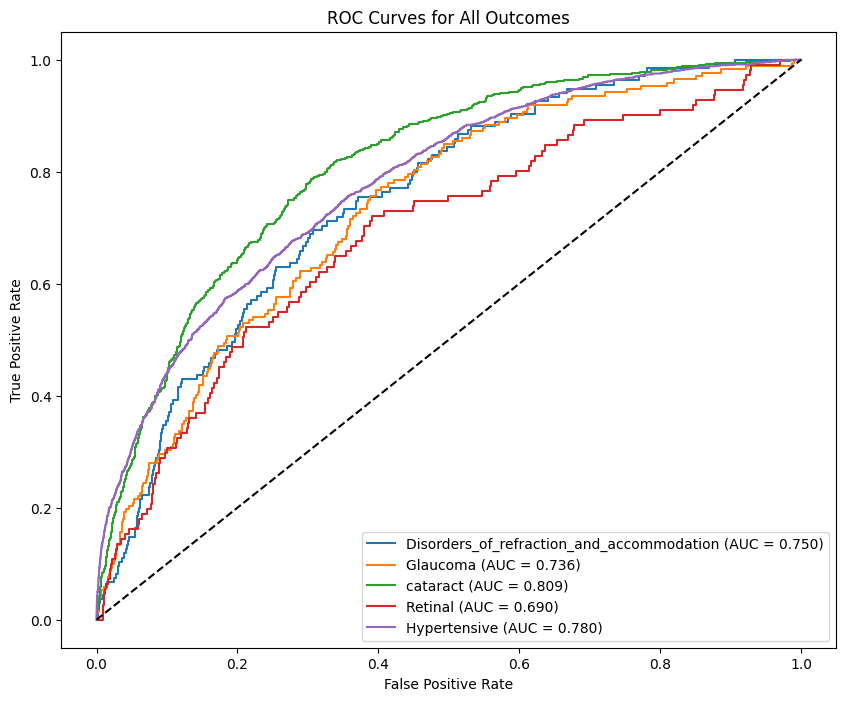

<Figure size 1500x1000 with 0 Axes>

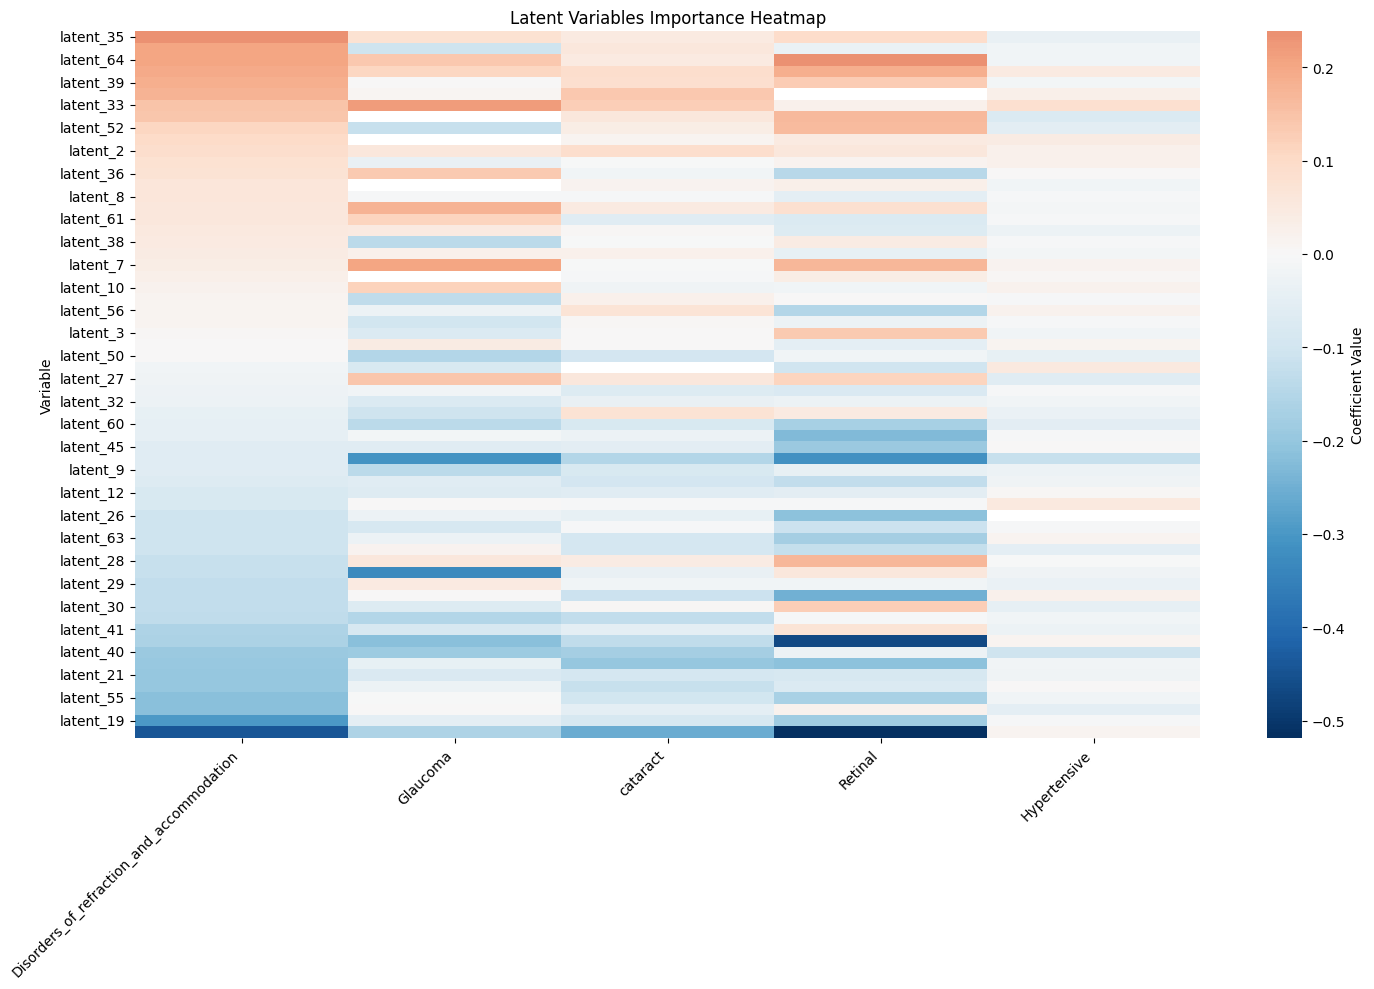

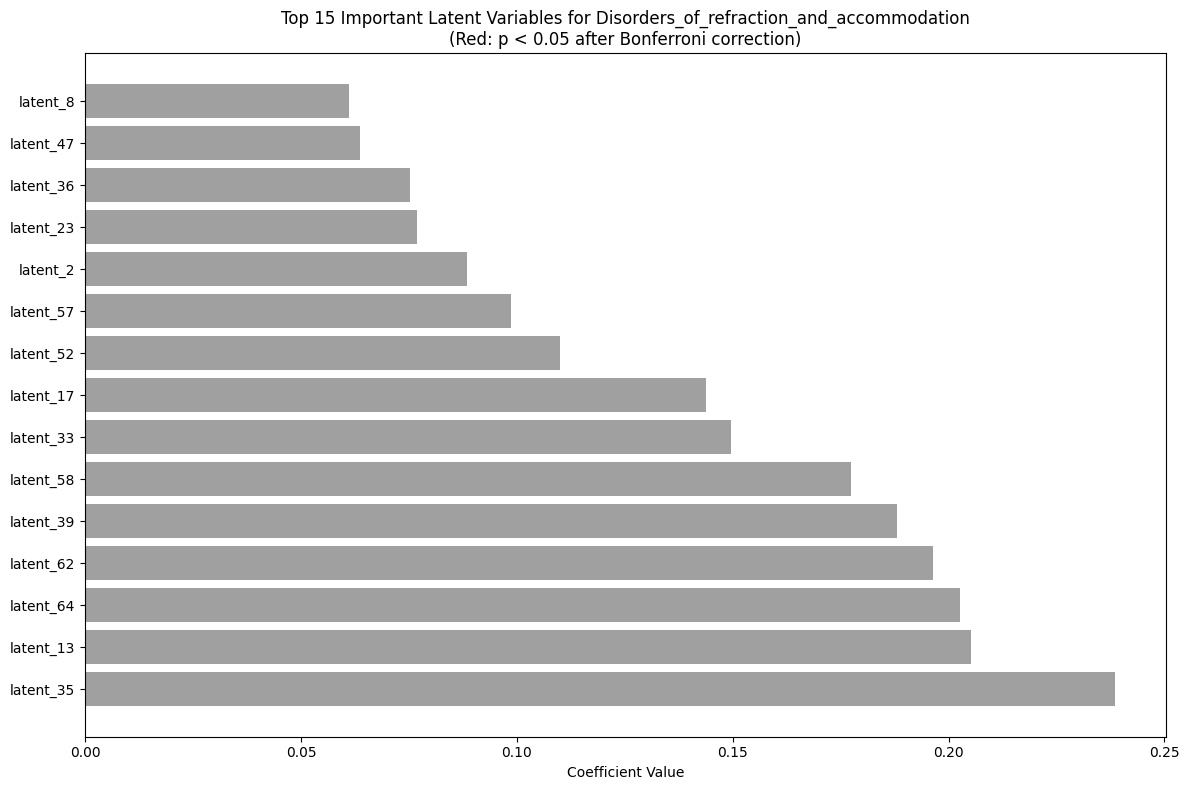

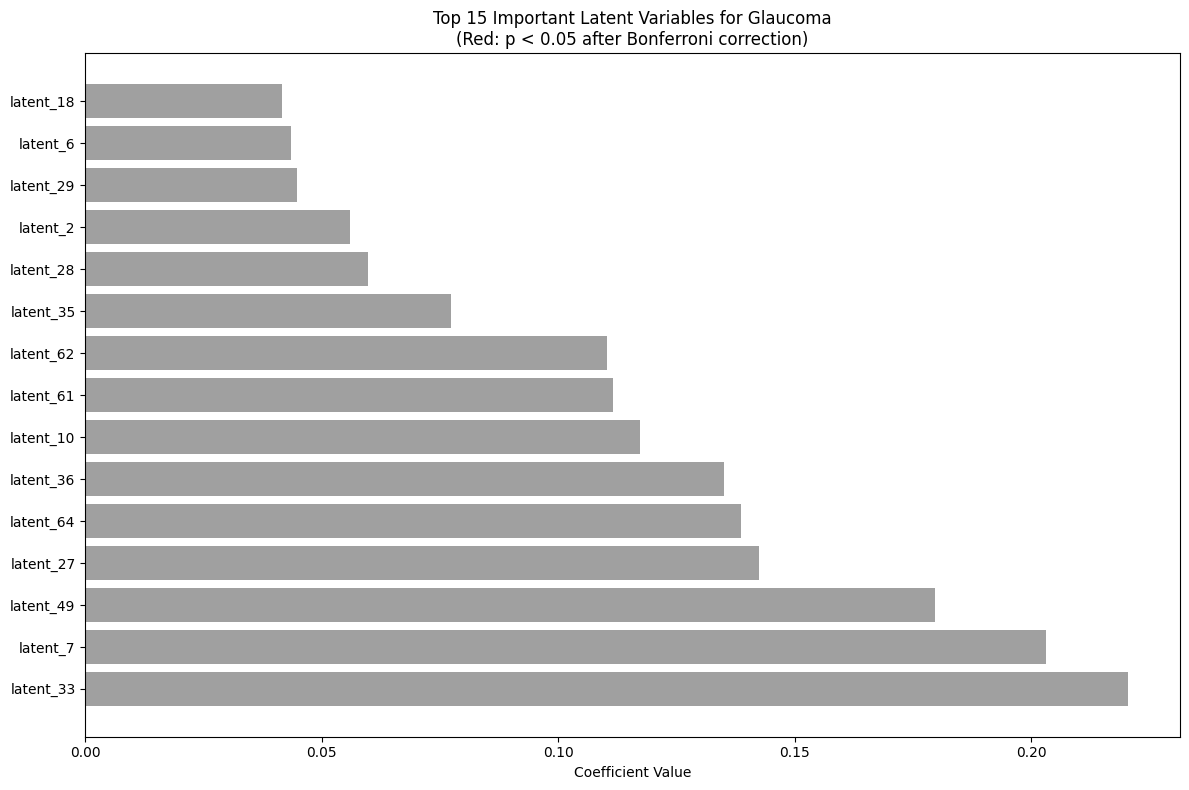

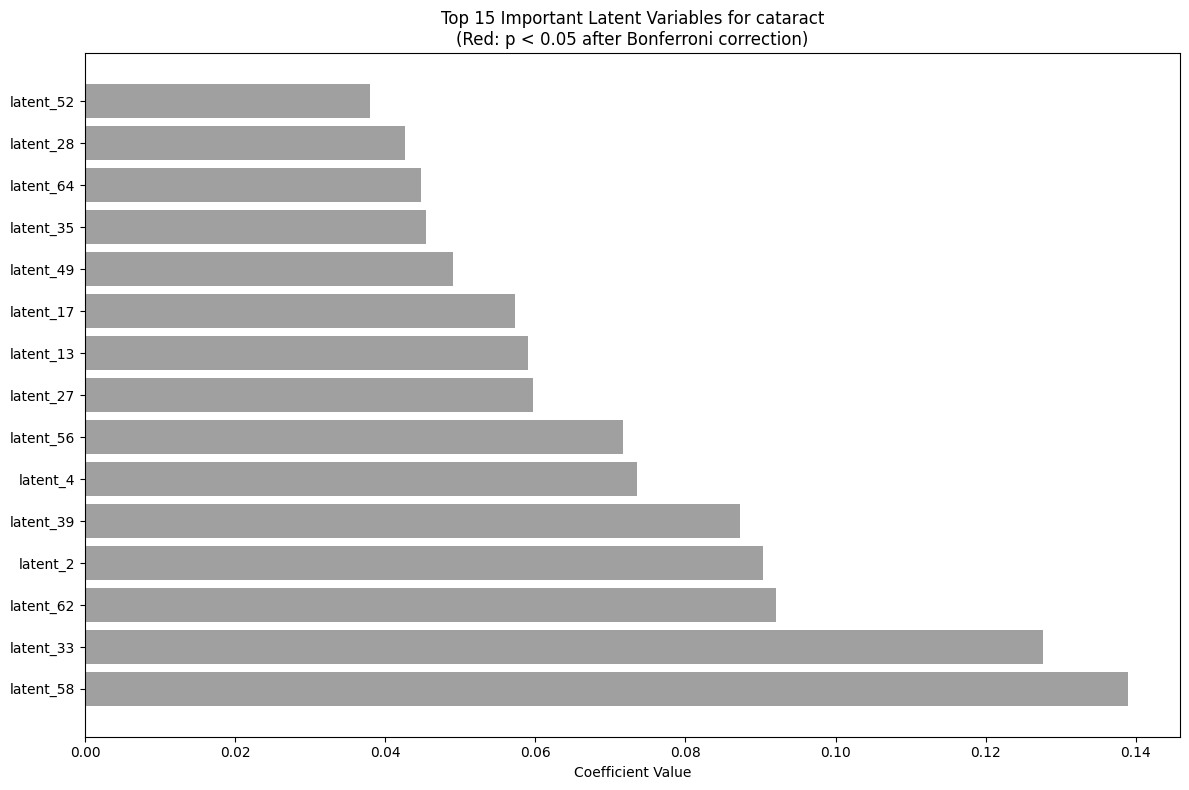

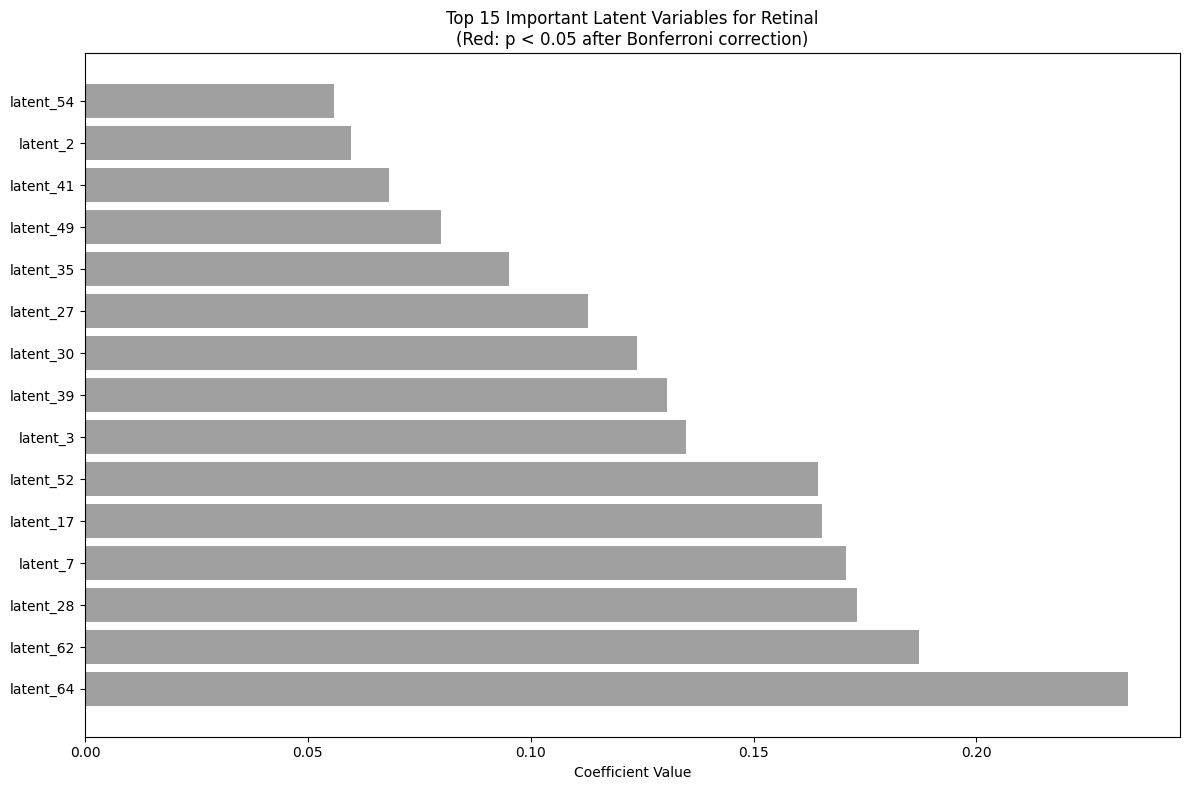

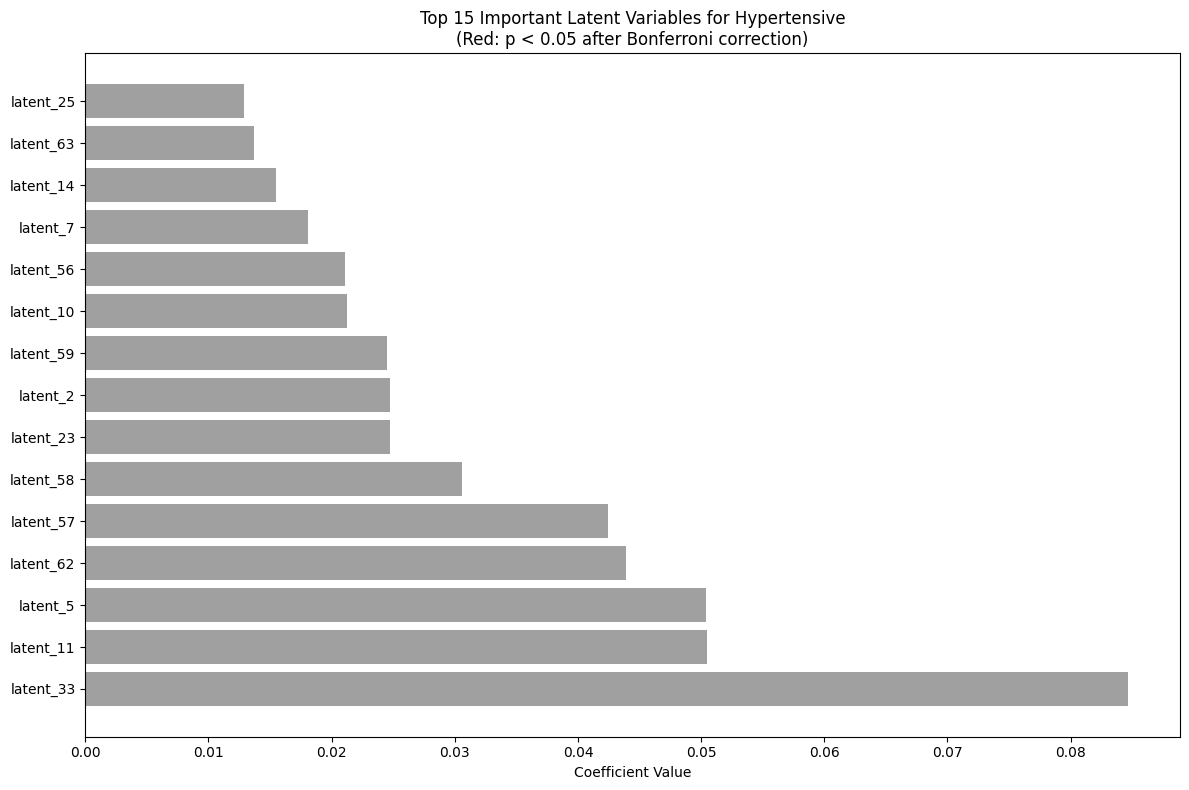

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.stats.multitest import multipletests

feature_path = '/home/wcy/data/UKB/eye_feature/lasso/left_flitter_disease.csv'
save_dir = '/home/wcy/data/UKB/eye_feature/lasso/left_flitter/'
latent_dim = 64

# 读取数据
df = pd.read_csv(feature_path)

outcomes = ['Disorders_of_refraction_and_accommodation', 'Glaucoma', 
           'cataract', 'Retinal',  'Hypertensive']
predictors = [f'latent_{i}' for i in range(1, latent_dim+1)]
covariates = ['Hypothyroidism', 'Diabetes', 'sex', 'smoking', 
              'alcohol', 'ethic', 'bmi', 'age']

results = {}

# 计算p值的函数
def calculate_pvalues(X, y, model):
    predictions = model.predict_proba(X)[:, 1]
    design_matrix = np.column_stack([np.ones(len(X)), X])
    V = np.diagflat(predictions * (1 - predictions))
    covMatrix = np.linalg.inv(np.dot(np.dot(design_matrix.T, V), design_matrix))
    std_errs = np.sqrt(np.diag(covMatrix)[1:])
    z_stats = model.coef_[0] / std_errs
    p_values = 2 * (1 - stats.norm.cdf(abs(z_stats)))
    return p_values

for outcome in outcomes:
    print(f"\nAnalyzing {outcome}...")
    
    X = df[predictors + covariates]
    y = df[outcome]
    
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
    
    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y, test_size=0.3, random_state=42)
    
    model = LogisticRegression(penalty='l1', solver='liblinear', random_state=42)
    model.fit(X_train, y_train)
    
    # 计算p值
    p_values = calculate_pvalues(X_train, y_train, model)
    
    # Bonferroni校正
    p_values_corrected = multipletests(p_values, method='bonferroni')[1]
    
    # 计算ROC曲线
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    auc = roc_auc_score(y_test, y_pred_proba)
    
    # 只获取潜变量的系数和p值
    coef_df = pd.DataFrame({
        'Variable': predictors,
        'Coefficient': model.coef_[0][:len(predictors)],
        'P_value': p_values[:len(predictors)],
        'P_value_corrected': p_values_corrected[:len(predictors)]
    })
    
    # 按系数绝对值排序
    significant_vars = coef_df[abs(coef_df['Coefficient']) > 0].sort_values(
        by='Coefficient', ascending=False)
    
    results[outcome] = {
        'auc': auc,
        'significant_vars': significant_vars,
        'roc_curve': (fpr, tpr)
    }
    
    print(f"AUC: {auc:.3f}")
    print("\nTop significant latent variables:")
    print(significant_vars)

# 绘制ROC曲线
plt.figure(figsize=(10, 8))
for outcome in outcomes:
    fpr, tpr = results[outcome]['roc_curve']
    plt.plot(fpr, tpr, label=f'{outcome} (AUC = {results[outcome]["auc"]:.3f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for All Outcomes')
plt.legend()
plt.savefig(save_dir + 'roc_curves.png', 
            dpi=300, bbox_inches='tight')
plt.show()

# 1. 热图展示
plt.figure(figsize=(15, 10))
importance_matrix = pd.DataFrame()
for outcome in outcomes:
    vars_df = results[outcome]['significant_vars']
    importance_matrix[outcome] = vars_df.set_index('Variable')['Coefficient']

plt.figure(figsize=(15, 10))
ax = sns.heatmap(importance_matrix, cmap='RdBu_r', center=0,
                 annot=False, fmt='.3f',
                 cbar_kws={'label': 'Coefficient Value'})

# 设置横轴标签倾斜
plt.xticks(rotation=45, ha='right')  # 45度倾斜，右对齐
# 或者使用更大角度：
# plt.xticks(rotation=60, ha='right')  # 60度倾斜
# plt.xticks(rotation=90, ha='center')  # 90度垂直

plt.title('Latent Variables Importance Heatmap')
plt.tight_layout()  # 自动调整布局，防止标签被切掉
plt.savefig(save_dir + 'latent_importance_heatmap.png',
            dpi=300, bbox_inches='tight')

for outcome in outcomes:
    significant_vars = results[outcome]['significant_vars']
    top_15 = significant_vars.head(15)
    
    plt.figure(figsize=(12, 8))
    
    # 创建颜色列表：显著的为红色(p<0.05)，不显著的为灰色
    colors = ['#FF4B4B' if p < 0.05 else '#A0A0A0' 
             for p in top_15['P_value_corrected']]
    
    # 绘制条形图
    bars = plt.barh(range(len(top_15)), top_15['Coefficient'],
                    color=colors)
    
    plt.yticks(range(len(top_15)), top_15['Variable'])
    plt.xlabel('Coefficient Value')
    plt.title(f'Top 15 Important Latent Variables for {outcome}\n(Red: p < 0.05 after Bonferroni correction)')
    plt.axvline(x=0, color='black', linestyle='-', linewidth=0.5)
    plt.tight_layout()
    plt.savefig(save_dir + f'latent_importance_{outcome}.png',
                dpi=300, bbox_inches='tight')
    plt.show()

# 保存详细结果到Excel
with pd.ExcelWriter(save_dir + 'latent_variables_results_with_pvalues.xlsx') as writer:
    # 保存AUC汇总
    pd.DataFrame({
        'Outcome': outcomes,
        'AUC': [results[outcome]['auc'] for outcome in outcomes]
    }).to_excel(writer, sheet_name='AUC_Summary', index=False)
    
    # 保存每个结局变量的结果（包含p值）
    for outcome in outcomes:
        results[outcome]['significant_vars'].to_excel(
            writer, sheet_name=f'{outcome[:31]}', index=False)

In [4]:
import csv
import os
import numpy as np
import pandas as pd

all_data_file = "/home/wcy/data/UKB/ukb47147.csv"
data_table = "/home/wcy/data/UKB/icd10_list.csv"


#读取要提取的列名
with open(data_table,'r',encoding='utf-8-sig') as csvfile: 
    reader = csv.reader(csvfile)
    column1 = [row[0]for row in reader]
    print('提取的列名称：',column1)

raw_data = pd.read_csv(all_data_file , usecols=column1)
raw_data.to_csv("/home/wcy/data/UKB/ukb47147_icd10.csv", index =False)

提取的列名称： ['eid', '53-0.0', '190-0.0', '191-0.0', '20001-0.0', '20001-0.1', '20001-0.2', '20001-0.3', '20001-0.4', '20001-0.5', '20001-1.0', '20001-1.1', '20001-1.2', '20001-1.3', '20001-1.4', '20001-1.5', '20001-2.0', '20001-2.1', '20001-2.2', '20001-2.3', '20001-2.4', '20001-2.5', '20001-3.0', '20001-3.1', '20001-3.2', '20001-3.3', '20001-3.4', '20001-3.5', '40000-0.0', '40000-1.0', '40001-0.0', '40005-0.0', '40006-0.0', '40005-1.0', '40006-1.0', '40005-2.0', '40005-3.0', '40005-4.0', '40005-5.0', '40005-6.0', '40005-7.0', '40005-8.0', '40005-9.0', '40005-10.0', '40005-11.0', '40005-12.0', '40005-13.0', '40005-14.0', '40005-15.0', '40005-16.0', '40006-2.0', '40006-3.0', '40006-4.0', '40006-5.0', '40006-6.0', '40006-7.0', '40006-8.0', '40006-9.0', '40006-10.0', '40006-11.0', '40006-12.0', '40006-13.0', '40006-14.0', '40006-15.0', '40006-16.0', '41270-0.0', '41270-0.1', '41270-0.2', '41270-0.3', '41270-0.4', '41270-0.5', '41270-0.6', '41270-0.7', '41270-0.8', '41270-0.9', '41270-0.10', '

/home/wcy/micromamba/envs/mmc2/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3553: DtypeWarning: Columns (458,14708,14709,14710,14740,14741,14742,14743,14744,14745,14746,14747,14748,14749,14750,14751,14752,14753,14754,14755,14756,14757,14758,14759,14760,14761,14762,14763,14764,14765,14766,14767,14768,14770,14772,14773,15865,15866,15867,15868,15869,15870,15871,15872,15873,15874,15875,15876,15877,15878,15879,15880,15881,15882,15883,15884,15885,15886,15887,15888,15889,15890,15891,15892,15893,15894,15895,15896,15897,15898,15899,15900,15901,15902,15903,15904,15905,15906,15907,15908,15909,15910,15911,15912,15913,15914,15915,15916,15917,15918,15919,15920,15921,15922,15923,15924,15925,15926,15927,15928,15929,15930,15931,15932,15933,15934,15935,15936,15937,15938,15939,15940,15941,15942,15943,15944,15945,15946,15947,15948,15949,15950,15951,15952,15953,15954,15955,15956,15957,15958,15959,15960,15961,15962,15963,15964,15965,15966,15967,15968,15969,15970,15971,15972,15973,15974,15975

# 生存分析

In [2]:
import csv
import os
import numpy as np
import pandas as pd

data1_path = "/home/wcy/data/UKB/eye_feature/lasso/left_flitter_disease.csv"
data2_path = "/home/wcy/data/UKB/eye_feature/lasso/cox_analysis/cataract.csv"
save_path = "/home/wcy/data/UKB/eye_feature/lasso/cox_analysis/left_flitter_cataract.csv"

data1 = pd.read_csv(data1_path)
data2 = pd.read_csv(data2_path)

merge_data = pd.merge(data1,data2,on="eid")
merge_data.to_csv(save_path, index=False)

# 相似度比较

In [2]:
import torch
import torch.nn as nn
import pandas as pd
import numpy as np
from PIL import Image, ImageFilter
import os
from scipy.stats import ttest_ind,ttest_rel
from scipy.ndimage import gaussian_filter
from tqdm import tqdm
import matplotlib.pyplot as plt
import pprint
from statsmodels.stats.contingency_tables import mcnemar
from model import VAE_vessel, VAE

In [3]:
latent_dim = 64
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f'Using device: {device}')

model_path = "/home/wcy/data/UKB/eye_feature/model/flitter_dim64_best.pth"
vae = VAE(latent_dim=latent_dim).to(device)
vae.load_state_dict(torch.load(model_path, map_location=device))
vae_decoder = vae.decoder
vae_decoder.eval()

Using device: cuda


Decoder(
  (decoder_input): Linear(in_features=64, out_features=50176, bias=True)
  (decoder): Sequential(
    (0): ConvTranspose2d(1024, 512, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (1): ReLU()
    (2): ConvTranspose2d(512, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (3): ReLU()
    (4): ConvTranspose2d(256, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (5): ReLU()
    (6): ConvTranspose2d(128, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (7): ReLU()
    (8): ConvTranspose2d(64, 3, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (9): Tanh()
  )
)

In [2]:
latent_dim = 128
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f'Using device: {device}')

model_path = "/home/wcy/data/UKB/eye_feature/model/vessel_dim128_best.pth"
vae = VAE_vessel(latent_dim=latent_dim).to(device)
vae.load_state_dict(torch.load(model_path, map_location=device))
vae_decoder = vae.decoder
vae_decoder.eval()

Using device: cuda


Decoder_vessel(
  (decoder_input): Linear(in_features=128, out_features=50176, bias=True)
  (decoder): Sequential(
    (0): ConvTranspose2d(1024, 512, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (1): ReLU()
    (2): Dropout(p=0.3, inplace=False)
    (3): ConvTranspose2d(512, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (4): ReLU()
    (5): Dropout(p=0.3, inplace=False)
    (6): ConvTranspose2d(256, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (7): ReLU()
    (8): Dropout(p=0.3, inplace=False)
    (9): ConvTranspose2d(128, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (10): ReLU()
    (11): Dropout(p=0.3, inplace=False)
    (12): ConvTranspose2d(64, 3, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (13): Tanh()
  )
)

Processed 50 images
Processed 100 images
Processed 150 images
Processed 200 images
Processed 250 images
Processed 300 images
Processed 350 images
Processed 400 images
Processed 450 images
Processed 500 images


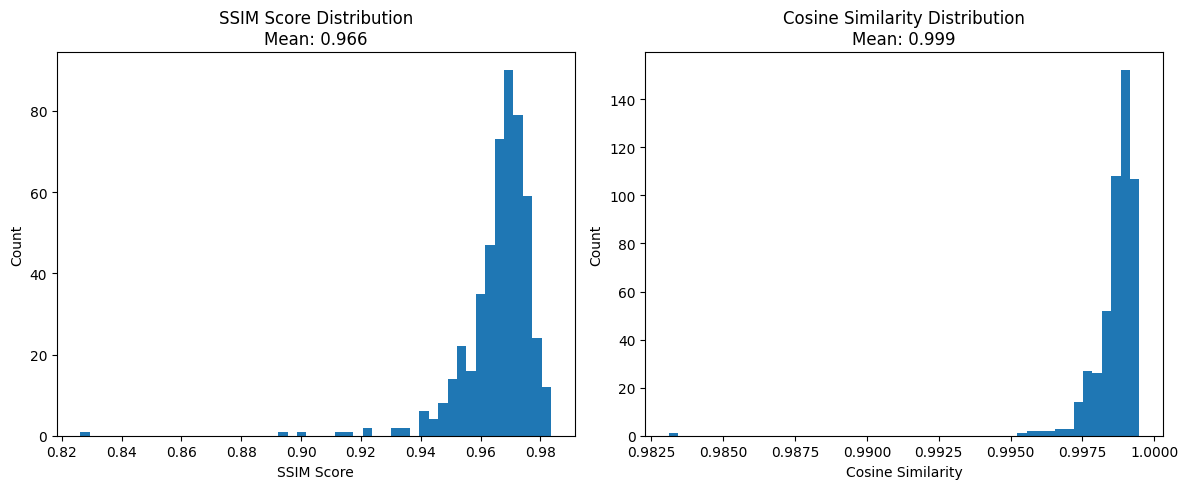


Statistical Summary:
SSIM Scores - Mean: 0.966, Std: 0.013
Cosine Similarity - Mean: 0.999, Std: 0.001


In [4]:
import pandas as pd
import torch
import numpy as np
from PIL import Image
import random
from sklearn.metrics.pairwise import cosine_similarity
from skimage.metrics import structural_similarity as ssim
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# 假设csv_file包含了所有潜在向量，image_dir是原始图像所在目录
csv_file = '/home/wcy/data/UKB/eye_feature/feature_data/left_flitter_dim64.csv'
image_dir = '/home/wcy/data/UKB/ukb_eye/Results_left/M1/left_flitter/'

# 读取潜在向量数据
latent_df = pd.read_csv(csv_file)

# 随机选择500个样本
n_samples = 500
total_samples = len(latent_df)
selected_indices = random.sample(range(total_samples), n_samples)

# 存储相似度分数
ssim_scores = []
cosine_scores = []

for idx in selected_indices:
    try:
        # 获取潜在向量
        latent_vector = torch.tensor(latent_df.iloc[idx, 1:].values, dtype=torch.float32).unsqueeze(0).to(device)
        
        # 生成图像
        with torch.no_grad():
            generated_image = vae_decoder(latent_vector)
            generated_image = generated_image.squeeze(0).permute(1, 2, 0).cpu().numpy()
            generated_image = (generated_image + 1) / 2
            generated_image = (generated_image * 255).astype(np.uint8)
        
        # 读取原始图像
        image_id = latent_df.iloc[idx, 0]
        image_name = f"{image_id}_21015_0_0.png"
        raw_image_path = f"{image_dir}/{image_name}"
        raw_image = Image.open(raw_image_path).convert('RGB')
        raw_image = raw_image.resize((224, 224))
        raw_image = np.array(raw_image)
        
        # 计算SSIM
        ssim_score = ssim(raw_image, generated_image, multichannel=True)
        ssim_scores.append(ssim_score)
        
        # 计算余弦相似度
        # 将图像展平为一维向量
        raw_flat = raw_image.flatten().reshape(1, -1)
        gen_flat = generated_image.flatten().reshape(1, -1)
        cosine_score = cosine_similarity(raw_flat, gen_flat)[0][0]
        cosine_scores.append(cosine_score)
        
        # 打印进度
        if (len(ssim_scores) % 50) == 0:
            print(f"Processed {len(ssim_scores)} images")
            
    except Exception as e:
        print(f"Error processing image {idx}: {str(e)}")
        continue

# 计算平均分数
avg_ssim = np.mean(ssim_scores)
avg_cosine = np.mean(cosine_scores)

# 绘制分布图
plt.figure(figsize=(12, 5))

# SSIM分布
plt.subplot(1, 2, 1)
plt.hist(ssim_scores, bins=50)
plt.title(f'SSIM Score Distribution\nMean: {avg_ssim:.3f}')
plt.xlabel('SSIM Score')
plt.ylabel('Count')

# 余弦相似度分布
plt.subplot(1, 2, 2)
plt.hist(cosine_scores, bins=50)
plt.title(f'Cosine Similarity Distribution\nMean: {avg_cosine:.3f}')
plt.xlabel('Cosine Similarity')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

# 打印详细统计信息
print("\nStatistical Summary:")
print(f"SSIM Scores - Mean: {avg_ssim:.3f}, Std: {np.std(ssim_scores):.3f}")
print(f"Cosine Similarity - Mean: {avg_cosine:.3f}, Std: {np.std(cosine_scores):.3f}")

In [7]:
import pandas as pd

# 文件列表
files = ['/home/wcy/data/UKB/eye_feature/gwas/validation_group/left_flitter_dim64_pheno/qcovar.txt', 
         '/home/wcy/data/UKB/eye_feature/gwas/validation_group/right_flitter_dim64_pheno/qcovar.txt', 
         '/home/wcy/data/UKB/eye_feature/gwas/main_group/left_flitter_dim64_pheno/qcovar.txt', 
         '/home/wcy/data/UKB/eye_feature/gwas/main_group/right_flitter_dim64_pheno/qcovar.txt']

# 存储所有第一列的集合
all_first_columns = set()

# 读取每个文件并添加第一列到集合中
for file in files:
    df = pd.read_csv(file,sep="\t")
    first_column = df.iloc[:, 0]  # 获取第一列
    all_first_columns.update(first_column)

# 转换为列表（如果需要）
result_list = list(all_first_columns)

# 打印结果
print(f"并集中共有 {len(result_list)} 个唯一元素")

# 如果需要保存结果
pd.Series(result_list).to_csv('/home/wcy/data/UKB/eye_feature/eid_list.txt', index=False)

并集中共有 38102 个唯一元素


In [8]:
import csv
import os
import numpy as np
import pandas as pd
from scipy import stats

eid_file = pd.read_csv("/home/wcy/data/UKB/eye_feature/eid_list.txt")
covariate_file = pd.read_csv("/home/wcy/data/UKB/eye_feature/covariate.csv")

df = pd.merge(eid_file,covariate_file, on='eid')

import pandas as pd
import numpy as np

# 假设数据已经读入为df
# df = pd.read_csv('your_file.csv')

# 将sex转换为更易读的标签
df['sex'] = df['sex'].map({0.0: 'Female', 1.0: 'Male'})

# 连续变量的描述性统计
continuous_stats = df.groupby('sex')[['bmi', 'age']].describe()
print("连续变量统计：")
print(continuous_stats)

# 分类变量统计
categorical_cols = ['smoking', 'alcohol', 'ethic']

# 创建结果DataFrame
results = []

for sex in ['Male', 'Female']:
    sex_data = df[df['sex'] == sex]
    total_sex = len(sex_data)
    
    row_data = {'性别': sex, '样本量': f"{total_sex}"}
    
    for col in categorical_cols:
        # 计算每个分类的数量和百分比
        value_counts = sex_data[col].value_counts()
        percentages = sex_data[col].value_counts(normalize=True) * 100
        
        for value in sorted(value_counts.index):
            count = value_counts.get(value, 0)
            percentage = percentages.get(value, 0)
            col_name = f"{col}_{value}"
            row_data[col_name] = f"{count} ({percentage:.1f}%)"
    
    results.append(row_data)

# 转换为DataFrame并打印
results_df = pd.DataFrame(results)

print("\n分类变量统计 [数量 (百分比)]：")
print(results_df)

连续变量统计：
            bmi                                                            \
          count       mean       std      min      25%      50%       75%   
sex                                                                         
Female  20938.0  26.735743  5.060466  12.6463  23.1849  25.8131  29.28115   
Male    17164.0  27.671735  4.138870  16.5108  24.9042  27.1810  29.82200   

                     age                                                     
            max    count       mean       std   min   25%   50%   75%   max  
sex                                                                          
Female  65.0138  20938.0  55.668975  8.051568  40.0  49.0  57.0  62.0  70.0  
Male    57.5621  17164.0  55.971510  8.276070  40.0  49.0  57.0  63.0  70.0  

分类变量统计 [数量 (百分比)]：
       性别    样本量 smoking_-3.0    smoking_0.0   smoking_1.0   smoking_2.0  \
0    Male  17164    52 (0.3%)   8719 (50.8%)  6465 (37.7%)  1928 (11.2%)   
1  Female  20938    55 (0.3%)  12464 (59.5%)

In [2]:
import csv
import os
import numpy as np
import pandas as pd
from scipy import stats

eid_file = pd.read_csv("/home/wcy/data/UKB/eye_feature/eid_list.txt")
covariate_file = pd.read_csv("/home/wcy/data/UKB/eye_feature/covariate.csv")

df = pd.merge(eid_file,covariate_file, on='eid')

# 连续变量的描述性统计
continuous_stats = df[['bmi', 'age']].describe()
print("连续变量统计：")
print(continuous_stats)

# 分类变量统计
categorical_cols = ['smoking', 'alcohol', 'ethic', 'sex']

# 创建结果DataFrame
results = []

total_samples = len(df)
row_data = {'样本量': f"{total_samples}"}

for col in categorical_cols:
    # 计算每个分类的数量和百分比
    value_counts = df[col].value_counts()
    percentages = df[col].value_counts(normalize=True) * 100
    
    for value in sorted(value_counts.index):
        count = value_counts.get(value, 0)
        percentage = percentages.get(value, 0)
        col_name = f"{col}_{value}"
        row_data[col_name] = f"{count} ({percentage:.1f}%)"

results.append(row_data)

# 转换为DataFrame并打印
results_df = pd.DataFrame(results)

print("\n分类变量统计 [数量 (百分比)]：")
print(results_df)

连续变量统计：
                bmi           age
count  27264.000000  27264.000000
mean      27.140375     55.492114
std        4.685470      8.129049
min       12.646300     40.000000
25%       23.918800     49.000000
50%       26.478200     56.000000
75%       29.515650     62.000000
max       65.013800     70.000000

分类变量统计 [数量 (百分比)]：
     样本量 smoking_-3.0    smoking_0.0   smoking_1.0  smoking_2.0 alcohol_-3.0  \
0  27264    69 (0.3%)  15543 (57.0%)  9250 (33.9%)  2402 (8.8%)    15 (0.1%)   

  alcohol_0.0 alcohol_1.0    alcohol_2.0    ethic_1001.0        sex_0.0  \
0  757 (2.8%)  841 (3.1%)  25651 (94.1%)  27264 (100.0%)  15025 (55.1%)   

         sex_1.0  
0  12239 (44.9%)  


In [9]:
import csv
import os
import numpy as np
import pandas as pd
from scipy import stats

# 读取数据
eid_file = pd.read_csv("/home/wcy/data/UKB/eye_feature/eid_list.txt")
covariate_file = pd.read_csv("/home/wcy/data/UKB/eye_feature/covariate.csv")
df = pd.merge(eid_file, covariate_file, on='eid')

# 设置显示选项
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_rows', None)

# 将sex转换为更易读的标签
df['sex'] = df['sex'].map({0.0: 'Female', 1.0: 'Male'})

# 连续变量的描述性统计
continuous_vars = ['age', 'bmi']
continuous_stats = df.groupby('ethic')[continuous_vars].agg(['mean', 'std', 'min', 'max'])
print("\n连续变量描述性统计：")
print(continuous_stats)

# 分类变量统计
categorical_cols = ['sex', 'smoking', 'alcohol']

# 创建结果DataFrame
results = []
ethnic_groups = sorted(df['ethic'].unique())

for ethnic in ethnic_groups:
    ethnic_data = df[df['ethic'] == ethnic]
    total_ethnic = len(ethnic_data)
    
    row_data = {'种族': ethnic, '样本量': f"{total_ethnic}"}
    
    # 添加连续变量的均值和标准差
    for var in continuous_vars:
        mean = ethnic_data[var].mean()
        std = ethnic_data[var].std()
        row_data[f"{var}"] = f"{mean:.2f} ± {std:.2f}"
    
    # 添加分类变量的计数和百分比
    for col in categorical_cols:
        value_counts = ethnic_data[col].value_counts()
        percentages = ethnic_data[col].value_counts(normalize=True) * 100
        
        for value in sorted(value_counts.index):
            count = value_counts.get(value, 0)
            percentage = percentages.get(value, 0)
            col_name = f"{col}_{value}"
            row_data[col_name] = f"{count} ({percentage:.1f}%)"
    
    results.append(row_data)

# 转换为DataFrame
results_df = pd.DataFrame(results)

# 统计检验
print("\n统计检验结果：")

# 连续变量的ANOVA检验
print("\n连续变量的ANOVA检验：")
for var in continuous_vars:
    groups = [group for _, group in df.groupby('ethic')[var]]
    f_stat, p_value = stats.f_oneway(*groups)
    print(f"{var}:")
    print(f"F统计量: {f_stat:.2f}")
    print(f"P值: {p_value:.4e}")

# 分类变量的卡方检验
print("\n分类变量的卡方检验：")
for col in categorical_cols:
    contingency_table = pd.crosstab(df['ethic'], df[col])
    chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)
    print(f"{col}:")
    print(f"卡方统计量: {chi2:.2f}")
    print(f"P值: {p_value:.4e}")
    print(f"自由度: {dof}")

# 为结果添加列名映射
column_mapping = {
    'sex_Male': '男性',
    'sex_Female': '女性',
    'smoking_0': '不吸烟',
    'smoking_1': '吸烟',
    'alcohol_0': '不饮酒',
    'alcohol_1': '饮酒',
    'age': '年龄(均值±标准差)',
    'bmi': 'BMI(均值±标准差)'
}

results_df = results_df.rename(columns=column_mapping)

print("\n最终人口统计学特征表：")
print(results_df)

# 保存结果
results_df.to_csv('demographic_statistics.csv', index=False)

# 计算效应量
print("\n效应量计算：")

# 连续变量的效应量 (Eta squared)
for var in continuous_vars:
    groups = [group for _, group in df.groupby('ethic')[var]]
    f_stat, _ = stats.f_oneway(*groups)
    df_between = len(groups) - 1
    df_total = len(df) - 1
    eta_squared = (f_stat * df_between) / (f_stat * df_between + df_total)
    print(f"{var} 的 Eta squared: {eta_squared:.4f}")

# 分类变量的效应量 (Cramer's V)
for col in categorical_cols:
    contingency_table = pd.crosstab(df['ethic'], df[col])
    chi2, _, _, _ = stats.chi2_contingency(contingency_table)
    n = contingency_table.sum().sum()
    min_dim = min(contingency_table.shape) - 1
    cramer_v = np.sqrt(chi2 / (n * min_dim))
    print(f"{col} 的 Cramer's V: {cramer_v:.4f}")


连续变量描述性统计：
              age                              bmi                            
             mean       std   min   max       mean       std      min      max
ethic                                                                         
1001.0  56.011864  8.091756  40.0  70.0  27.188344  4.688531  12.6463  65.0138
1002.0  54.720557  8.414429  40.0  70.0  27.302138  4.675613  17.9282  54.1076
1003.0  52.907684  8.466789  40.0  70.0  26.495742  4.698849  16.0008  50.5598

统计检验结果：

连续变量的ANOVA检验：
age:
F统计量: 147.37
P值: 1.7584e-64
bmi:
F统计量: 20.75
P值: 9.8663e-10

分类变量的卡方检验：
sex:
卡方统计量: 55.48
P值: 8.9601e-13
自由度: 2
smoking:
卡方统计量: 101.69
P值: 1.1154e-19
自由度: 6
alcohol:
卡方统计量: 42.19
P值: 1.6890e-07
自由度: 6

最终人口统计学特征表：
       种族    样本量    年龄(均值±标准差)   BMI(均值±标准差)             女性             男性  \
0  1001.0  34728  56.01 ± 8.09  27.19 ± 4.69  18958 (54.6%)  15770 (45.4%)   
1  1002.0   1435  54.72 ± 8.41  27.30 ± 4.68    758 (52.8%)    677 (47.2%)   
2  1003.0   1939  52.91 ± 8.47  26.50

In [1]:
import csv
import os
import numpy as np
import pandas as pd
from scipy import stats

# 读取数据
eid_file = pd.read_csv("/home/wcy/data/UKB/eye_feature/eid_list.txt")
covariate_file = pd.read_csv("/home/wcy/data/UKB/eye_feature/covariate.csv")
df = pd.merge(eid_file, covariate_file, on='eid')

# 设置显示选项
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_rows', None)

# 将sex转换为更易读的标签
df['sex'] = df['sex'].map({0.0: 'Female', 1.0: 'Male'})

# 创建新的分组变量：ethic为1001的一组，ethic为1002和1003的另一组
df['group'] = df['ethic'].apply(lambda x: 'Group_1' if x == 1001 else 'Group_2')

print("\n样本分组情况：")
print(df['group'].value_counts())

# 连续变量和分类变量
continuous_vars = ['age', 'bmi']
categorical_cols = ['sex', 'smoking', 'alcohol']

# 创建结果DataFrame
results = []
groups = ['Group_1', 'Group_2']

for group in groups:
    group_data = df[df['group'] == group]
    total_group = len(group_data)
    
    row_data = {'分组': group, '样本量': f"{total_group}"}
    
    # 添加连续变量的均值和标准差
    for var in continuous_vars:
        mean = group_data[var].mean()
        std = group_data[var].std()
        row_data[f"{var}"] = f"{mean:.2f} ± {std:.2f}"
    
    # 添加分类变量的计数和百分比
    for col in categorical_cols:
        value_counts = group_data[col].value_counts()
        percentages = group_data[col].value_counts(normalize=True) * 100
        
        for value in sorted(value_counts.index):
            count = value_counts.get(value, 0)
            percentage = percentages.get(value, 0)
            col_name = f"{col}_{value}"
            row_data[col_name] = f"{count} ({percentage:.1f}%)"
    
    results.append(row_data)

# 转换为DataFrame
results_df = pd.DataFrame(results)

# 统计检验
print("\n两组间统计检验结果：")

# 连续变量的t检验
print("\n连续变量的t检验：")
for var in continuous_vars:
    group1_data = df[df['group'] == 'Group_1'][var]
    group2_data = df[df['group'] == 'Group_2'][var]
    
    # 首先进行Levene检验，检查方差是否相等
    levene_stat, levene_p = stats.levene(group1_data, group2_data)
    equal_var = levene_p > 0.05  # 如果p>0.05，则方差相等
    
    # 根据Levene检验结果选择t检验的方法
    t_stat, p_value = stats.ttest_ind(group1_data, group2_data, equal_var=equal_var)
    
    # 计算Cohen's d效应量
    n1, n2 = len(group1_data), len(group2_data)
    mean1, mean2 = group1_data.mean(), group2_data.mean()
    var1, var2 = group1_data.var(), group2_data.var()
    
    # 池化标准差
    pooled_std = np.sqrt(((n1-1)*var1 + (n2-1)*var2) / (n1+n2-2))
    
    # Cohen's d
    cohen_d = abs(mean1 - mean2) / pooled_std
    
    print(f"{var}:")
    print(f"组1均值: {mean1:.2f}, 组2均值: {mean2:.2f}")
    print(f"Levene检验 p值: {levene_p:.4f} ({'' if equal_var else '不'}等方差)")
    print(f"t统计量: {t_stat:.2f}")
    print(f"P值: {p_value:.4e}")
    print(f"Cohen's d: {cohen_d:.4f}")
    print(f"效应大小: {'小' if cohen_d < 0.2 else '中' if cohen_d < 0.8 else '大'}")

# 分类变量的卡方检验
print("\n分类变量的卡方检验：")
for col in categorical_cols:
    contingency_table = pd.crosstab(df['group'], df[col])
    print(f"\n{col} 列联表:")
    print(contingency_table)
    
    chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)
    
    # 计算Cramer's V效应量
    n = contingency_table.sum().sum()
    min_dim = min(contingency_table.shape) - 1
    cramer_v = np.sqrt(chi2 / (n * min_dim)) if min_dim > 0 else 0
    
    print(f"卡方统计量: {chi2:.2f}")
    print(f"P值: {p_value:.4e}")
    print(f"自由度: {dof}")
    print(f"Cramer's V: {cramer_v:.4f}")
    print(f"效应大小: {'小' if cramer_v < 0.1 else '中' if cramer_v < 0.3 else '大'}")

# 为结果添加列名映射
column_mapping = {
    'sex_Male': '男性',
    'sex_Female': '女性',
    'smoking_0': '不吸烟',
    'smoking_1': '吸烟',
    'alcohol_0': '不饮酒',
    'alcohol_1': '饮酒',
    'age': '年龄(均值±标准差)',
    'bmi': 'BMI(均值±标准差)',
    '分组': '分组'
}

results_df = results_df.rename(columns=column_mapping)

print("\n最终人口统计学特征比较表：")
print(results_df)

# 保存结果
results_df.to_csv('two_group_demographic_comparison.csv', index=False)

# 可以选择添加详细比较结果的保存
with open('detailed_statistics_comparison.txt', 'w') as f:
    f.write("两组人口统计学比较详细结果\n")
    f.write("=" * 50 + "\n\n")
    
    f.write("样本分组情况：\n")
    f.write(str(df['group'].value_counts()) + "\n\n")
    
    f.write("连续变量的t检验：\n")
    for var in continuous_vars:
        group1_data = df[df['group'] == 'Group_1'][var]
        group2_data = df[df['group'] == 'Group_2'][var]
        
        levene_stat, levene_p = stats.levene(group1_data, group2_data)
        equal_var = levene_p > 0.05
        
        t_stat, p_value = stats.ttest_ind(group1_data, group2_data, equal_var=equal_var)
        
        n1, n2 = len(group1_data), len(group2_data)
        mean1, mean2 = group1_data.mean(), group2_data.mean()
        var1, var2 = group1_data.var(), group2_data.var()
        
        pooled_std = np.sqrt(((n1-1)*var1 + (n2-1)*var2) / (n1+n2-2))
        cohen_d = abs(mean1 - mean2) / pooled_std
        
        f.write(f"{var}:\n")
        f.write(f"组1均值: {mean1:.2f}, 组2均值: {mean2:.2f}\n")
        f.write(f"组1标准差: {np.sqrt(var1):.2f}, 组2标准差: {np.sqrt(var2):.2f}\n")
        f.write(f"Levene检验 p值: {levene_p:.4f} ({'' if equal_var else '不'}等方差)\n")
        f.write(f"t统计量: {t_stat:.2f}\n")
        f.write(f"P值: {p_value:.4e}\n")
        f.write(f"Cohen's d: {cohen_d:.4f}\n")
        f.write(f"效应大小: {'小' if cohen_d < 0.2 else '中' if cohen_d < 0.8 else '大'}\n\n")
    
    f.write("分类变量的卡方检验：\n")
    for col in categorical_cols:
        contingency_table = pd.crosstab(df['group'], df[col])
        f.write(f"\n{col} 列联表:\n")
        f.write(str(contingency_table) + "\n")
        
        chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)
        
        n = contingency_table.sum().sum()
        min_dim = min(contingency_table.shape) - 1
        cramer_v = np.sqrt(chi2 / (n * min_dim)) if min_dim > 0 else 0
        
        f.write(f"卡方统计量: {chi2:.2f}\n")
        f.write(f"P值: {p_value:.4e}\n")
        f.write(f"自由度: {dof}\n")
        f.write(f"Cramer's V: {cramer_v:.4f}\n")
        f.write(f"效应大小: {'小' if cramer_v < 0.1 else '中' if cramer_v < 0.3 else '大'}\n\n")

print("详细统计结果已保存到 'detailed_statistics_comparison.txt'")


样本分组情况：
Group_1    34728
Group_2     3374
Name: group, dtype: int64

两组间统计检验结果：

连续变量的t检验：
age:
组1均值: 56.01, 组2均值: 53.68
Levene检验 p值: 0.0000 (不等方差)
t统计量: 15.30
P值: 2.1252e-51
Cohen's d: 0.2871
效应大小: 中
bmi:
组1均值: 27.19, 组2均值: 26.84
Levene检验 p值: 0.6650 (等方差)
t统计量: 4.13
P值: 3.5716e-05
Cohen's d: 0.0745
效应大小: 小

分类变量的卡方检验：

sex 列联表:
sex      Female   Male
group                 
Group_1   18958  15770
Group_2    1980   1394
卡方统计量: 20.66
P值: 5.4920e-06
自由度: 1
Cramer's V: 0.0233
效应大小: 小

smoking 列联表:
smoking  -3.0    0.0    1.0   2.0
group                            
Group_1    92  19553  11961  3122
Group_2    15   1630   1296   433
卡方统计量: 101.49
P值: 7.4362e-22
自由度: 3
Cramer's V: 0.0516
效应大小: 小

alcohol 列联表:
alcohol  -3.0   0.0   1.0    2.0
group                           
Group_1    17  1012  1097  32602
Group_2     7   133   139   3095
卡方统计量: 33.35
P值: 2.7232e-07
自由度: 3
Cramer's V: 0.0296
效应大小: 小

最终人口统计学特征比较表：
        分组    样本量    年龄(均值±标准差)   BMI(均值±标准差)             女性             男性  \

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import os

raw_path = "/home/wcy/data/UKB/eye_feature/disease_cor/novel_loci/"
save_path = "/home/wcy/data/UKB/eye_feature/disease_cor/novel_loci/pic_data/"

# 步骤1: 读取两个CSV文件
df1 = pd.read_csv(raw_path + "right_optic-ICH.csv",sep = '\t')
df2 = pd.read_csv(raw_path + "left_optic-ICH.csv",sep = '\t')

file_name = os.path.basename(raw_path + "right_optic-ICH.csv")
feature_disease = file_name.replace("right_", "").replace("left_", "")

# 步骤2: 按列合并两个DataFrame
# 使用concat函数水平合并(axis=1)
# 如果两个文件有相同的列名，可以使用后缀区分
merged_df = pd.concat([df1, df2], axis=1)

# 步骤3: 处理可能出现的重复列名问题
# 如果SNPID列在两个文件中都存在，需要选择一个保留
if 'SNPID' in df1.columns and 'SNPID' in df2.columns:
    # 假设我们保留第一个文件的SNPID列
    merged_df = merged_df.loc[:, ~merged_df.columns.duplicated()]

# 步骤4: 删除SNPID列中的重复值
merged_df = merged_df.drop_duplicates(subset=['SNPID'])

# 步骤5: 只保留SNPID和NOVEL列
if 'NOVEL' in merged_df.columns:
    final_df = merged_df[['SNPID', 'NOVEL']]
else:
    print("'NOVEL'列不存在于合并后的数据中")
    # 如果NOVEL列不存在，只保留SNPID列
    final_df = merged_df[['SNPID']]

# 步骤6: 将结果保存为新的CSV文件
final_df.to_csv(save_path + feature_disease, index=False)

print(f"处理完成，共有{len(final_df)}行数据")



处理完成，共有53行数据


In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import glob
import math
import numpy as np

# 设置路径
raw_path = "/home/wcy/data/UKB/eye_feature/disease_cor/novel_loci/pic_data/"
save_path = "/home/wcy/data/UKB/eye_feature/disease_cor/novel_loci/pic_data/graphs/"

# 确保保存路径存在
os.makedirs(save_path, exist_ok=True)

# 查找所有CSV文件
csv_files = glob.glob(os.path.join(raw_path, "flitter*.csv"))

# 如果没有找到CSV文件，退出
if len(csv_files) == 0:
    print(f"在路径 {raw_path} 中未找到CSV文件")
    exit(1)

print(f"找到 {len(csv_files)} 个CSV文件")

# 计算行列数量（尽量接近正方形布局）
n_files = len(csv_files)
n_cols = math.ceil(math.sqrt(n_files))
n_rows = math.ceil(n_files / n_cols)

# 创建一个大图，包含多个子图
fig = plt.figure(figsize=(n_cols * 5, n_rows * 4 + 1))  # 额外的高度用于图例

# 存储所有文件的数据，用于生成汇总信息
all_data = {
    'file_names': [],
    'total_snps': [],
    'novel_counts': [],
    'novel_percentages': []
}

# 处理每个CSV文件
for i, csv_file in enumerate(csv_files):
    # 获取文件名（不带路径）
    file_basename = os.path.basename(csv_file)
    feature_disease = os.path.splitext(file_basename)[0].replace("flitter-", "").replace("vessel-", "") .replace("optic-", "")  # 去掉.csv扩展名
    
    print(f"正在处理: {feature_disease}")
    
    try:
        # 读取CSV文件
        df = pd.read_csv(csv_file)
        
        # 检查是否包含必要的列
        if 'SNPID' not in df.columns or 'NOVEL' not in df.columns:
            print(f"文件 {file_basename} 缺少SNPID或NOVEL列，跳过")
            continue
        
        # 确保NOVEL列的值为布尔型或可转换为布尔型的值
        if df['NOVEL'].dtype == 'object':
            try:
                # 转换常见的"TRUE"/"FALSE"、"True"/"False"、"true"/"false"等变体
                df['NOVEL'] = df['NOVEL'].str.upper().map({'TRUE': True, 'FALSE': False})
            except:
                print(f"文件 {file_basename} 的NOVEL列不是标准的TRUE/FALSE格式，尝试其他转换方法...")
                try:
                    df['NOVEL'] = df['NOVEL'].astype(bool)
                except:
                    print(f"无法将文件 {file_basename} 的NOVEL列转换为布尔类型，跳过此文件")
                    continue
        
        # 计算TRUE和FALSE的数量
        true_count = df['NOVEL'].sum()  # 布尔型True的值求和为1，False为0
        false_count = len(df) - true_count
        
        # 存储数据用于汇总
        all_data['file_names'].append(feature_disease)
        all_data['total_snps'].append(len(df))
        all_data['novel_counts'].append(true_count)
        all_data['novel_percentages'].append(true_count / len(df) * 100 if len(df) > 0 else 0)
        
        # 创建子图
        ax = fig.add_subplot(n_rows, n_cols, i + 1)
        
        # 绘制扇形图
        sizes = [true_count, false_count]
        colors = ['#ff9999', '#66b3ff']
        explode = (0.1, 0)  # 突出显示"Novel"部分
        
        wedges, _ = ax.pie(sizes, explode=explode, colors=colors,
                         autopct='%1.1f%%', shadow=True, startangle=90)
        
        # 美化标题，将特征名和疾病名格式化
        pretty_title = feature_disease.replace("-", " vs\n").replace("_", " ").title()
        ax.set_title(pretty_title, fontsize=12)
        
        # 显示总SNP数
        ax.text(0, -1.2, f'Total: {len(df)}', ha='center', va='center', fontsize=9)
        ax.text(-0.8, -1.2, f'Novel: {true_count}', ha='center', va='center', fontsize=8)
        ax.text(0.8, -1.2, f'Not Novel: {false_count}', ha='center', va='center', fontsize=8)
        
    except Exception as e:
        print(f"处理文件 {file_basename} 时出错: {str(e)}")

# 调整子图之间的间距
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # 为图例留出空间

# 添加共用图例
# 创建一个额外的轴用于放置图例
legend_ax = fig.add_axes([0.5, 0, 0.01, 0.01])  # [left, bottom, width, height]
legend_ax.axis('off')
legend_elements = [
    plt.Rectangle((0, 0), 1, 1, fc='#ff9999', edgecolor='none', label='Novel (TRUE)'),
    plt.Rectangle((0, 0), 1, 1, fc='#66b3ff', edgecolor='none', label='Not Novel (FALSE)')
]
legend = legend_ax.legend(handles=legend_elements, loc='upper center', 
                         bbox_to_anchor=(0, -0.05, 1, 1),
                         bbox_transform=fig.transFigure, ncol=2, fontsize=12)

# 添加总标题
plt.suptitle('Distribution of Novel vs. Not Novel SNPs Across Different Feature-Disease Pairs', 
           fontsize=16, y=0.98)

# 保存图片
plt.savefig(os.path.join(save_path, "all_novel_distributions_pie.png"), dpi=300, bbox_inches='tight')
plt.savefig(os.path.join(save_path, "all_novel_distributions_pie.svg"), format='svg', bbox_inches='tight')

print(f"汇总扇形图已保存为 all_novel_distributions_pie.png/svg")

# 创建一个汇总表格图
plt.figure(figsize=(12, len(csv_files) * 0.5 + 2))
plt.axis('tight')
plt.axis('off')

# 创建表格数据
table_data = [
    ['Feature-Disease Pair', 'Total SNPs', 'Novel SNPs', 'Novel %']
]

for i in range(len(all_data['file_names'])):
    table_data.append([
        all_data['file_names'][i].replace("-", " vs ").replace("_", " ").title(),
        str(all_data['total_snps'][i]),
        str(all_data['novel_counts'][i]),
        f"{all_data['novel_percentages'][i]:.1f}%"
    ])

# 添加汇总行
if all_data['total_snps']:
    total_snps = sum(all_data['total_snps'])
    total_novel = sum(all_data['novel_counts'])
    avg_percentage = total_novel / total_snps * 100 if total_snps > 0 else 0
    
    table_data.append([
        'TOTAL',
        str(total_snps),
        str(total_novel),
        f"{avg_percentage:.1f}%"
    ])

# 创建表格
table = plt.table(cellText=table_data, colWidths=[0.4, 0.2, 0.2, 0.2], 
                 loc='center', cellLoc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 1.5)  # 调整表格大小

# 设置标题行的样式
for j, cell in enumerate(table._cells[(0, j)] for j in range(len(table_data[0]))):
    cell.set_text_props(weight='bold', color='white')
    cell.set_facecolor('#4472C4')

# 设置总计行的样式（如果有）
if all_data['total_snps']:
    for j, cell in enumerate(table._cells[(len(table_data)-1, j)] for j in range(len(table_data[0]))):
        cell.set_text_props(weight='bold')
        cell.set_facecolor('#E6E6E6')

# 交替行颜色
for i in range(1, len(table_data)-1):
    if i % 2 == 0:
        for j in range(len(table_data[0])):
            table._cells[(i, j)].set_facecolor('#F2F2F2')

plt.title('Summary of Novel SNPs Distribution', fontsize=14, pad=20)

# 保存表格图
plt.savefig(os.path.join(save_path, "novel_snps_summary_table.png"), dpi=300, bbox_inches='tight')
plt.savefig(os.path.join(save_path, "novel_snps_summary_table.svg"), format='svg', bbox_inches='tight')

print(f"汇总表格已保存为 novel_snps_summary_table.png/svg")

# 关闭图形以释放内存
plt.close('all')

print(f"全部处理完成，图形已保存到 {save_path}")

找到 6 个CSV文件
正在处理: myopia
处理文件 flitter-myopia.csv 时出错: too many values to unpack (expected 2)
正在处理: MS
处理文件 flitter-MS.csv 时出错: too many values to unpack (expected 2)
正在处理: AMD
处理文件 flitter-AMD.csv 时出错: too many values to unpack (expected 2)
正在处理: DR
处理文件 flitter-DR.csv 时出错: too many values to unpack (expected 2)
正在处理: RP
处理文件 flitter-RP.csv 时出错: too many values to unpack (expected 2)
正在处理: SLE
处理文件 flitter-SLE.csv 时出错: too many values to unpack (expected 2)
汇总扇形图已保存为 all_novel_distributions_pie.png/svg
汇总表格已保存为 novel_snps_summary_table.png/svg
全部处理完成，图形已保存到 /home/wcy/data/UKB/eye_feature/disease_cor/novel_loci/pic_data/graphs/


找到 6 个CSV文件
正在处理: flitter-myopia (显示为: myopia)
处理文件 flitter-myopia.csv 时出错: too many values to unpack (expected 2)
正在处理: flitter-MS (显示为: MS)
处理文件 flitter-MS.csv 时出错: too many values to unpack (expected 2)
正在处理: flitter-AMD (显示为: AMD)
处理文件 flitter-AMD.csv 时出错: too many values to unpack (expected 2)
正在处理: flitter-DR (显示为: DR)
处理文件 flitter-DR.csv 时出错: too many values to unpack (expected 2)
正在处理: flitter-RP (显示为: RP)
处理文件 flitter-RP.csv 时出错: too many values to unpack (expected 2)
正在处理: flitter-SLE (显示为: SLE)
处理文件 flitter-SLE.csv 时出错: too many values to unpack (expected 2)


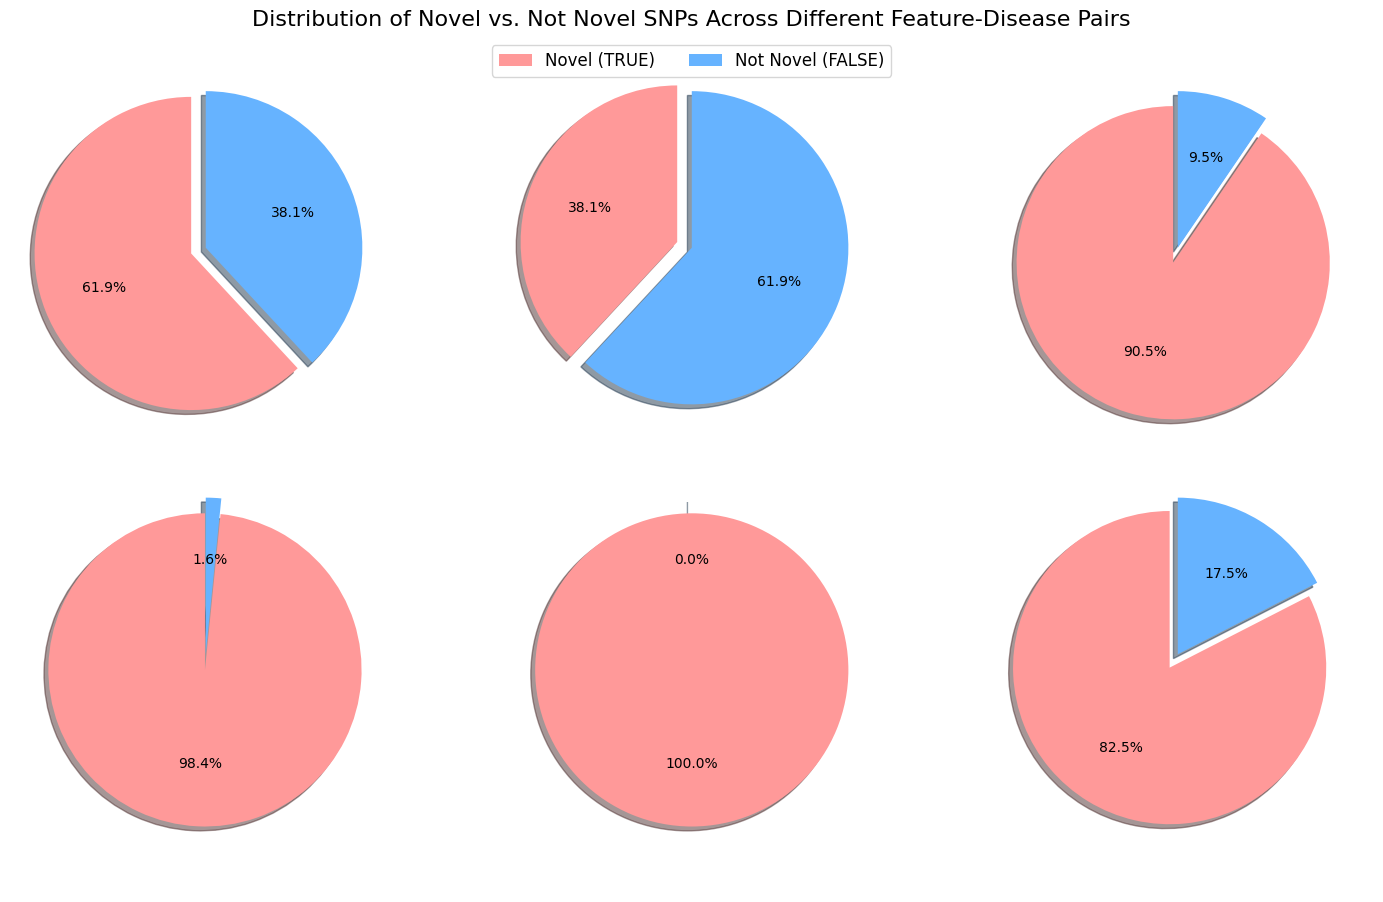

汇总扇形图已保存为 flitter_novel_distributions_pie.png/svg
汇总表格已保存为 flitter_novel_snps_summary_table.png/svg
全部处理完成，图形已保存到 /home/wcy/data/UKB/eye_feature/disease_cor/novel_loci/pic_data/graphs/


In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import glob
import math
import numpy as np

# 设置路径
raw_path = "/home/wcy/data/UKB/eye_feature/disease_cor/novel_loci/pic_data/"
save_path = "/home/wcy/data/UKB/eye_feature/disease_cor/novel_loci/pic_data/graphs/"

# 确保保存路径存在
os.makedirs(save_path, exist_ok=True)

# 查找所有CSV文件
csv_files = glob.glob(os.path.join(raw_path, "flitter*.csv"))

# 如果没有找到CSV文件，退出
if len(csv_files) == 0:
    print(f"在路径 {raw_path} 中未找到CSV文件")
    exit(1)

print(f"找到 {len(csv_files)} 个CSV文件")

# 计算行列数量（尽量接近正方形布局）
n_files = len(csv_files)
n_cols = math.ceil(math.sqrt(n_files))
n_rows = math.ceil(n_files / n_cols)

# 创建一个大图，包含多个子图
fig = plt.figure(figsize=(n_cols * 5, n_rows * 4 + 1))  # 额外的高度用于图例

# 存储所有文件的数据，用于生成汇总信息
all_data = {
    'file_names': [],
    'total_snps': [],
    'novel_counts': [],
    'novel_percentages': []
}

# 处理每个CSV文件
for i, csv_file in enumerate(csv_files):
    # 获取文件名（不带路径）
    file_basename = os.path.basename(csv_file)
    original_name = os.path.splitext(file_basename)[0]  # 原始文件名（不带扩展名）
    # 处理显示名称，去掉前缀
    display_name = original_name.replace("flitter-", "").replace("vessel-", "").replace("optic-", "")
    
    print(f"正在处理: {original_name} (显示为: {display_name})")
    
    try:
        # 读取CSV文件
        df = pd.read_csv(csv_file)
        
        # 检查是否包含必要的列
        if 'SNPID' not in df.columns or 'NOVEL' not in df.columns:
            print(f"文件 {file_basename} 缺少SNPID或NOVEL列，跳过")
            continue
        
        # 确保NOVEL列的值为布尔型或可转换为布尔型的值
        if df['NOVEL'].dtype == 'object':
            try:
                # 转换常见的"TRUE"/"FALSE"、"True"/"False"、"true"/"false"等变体
                df['NOVEL'] = df['NOVEL'].str.upper().map({'TRUE': True, 'FALSE': False})
            except:
                print(f"文件 {file_basename} 的NOVEL列不是标准的TRUE/FALSE格式，尝试其他转换方法...")
                try:
                    df['NOVEL'] = df['NOVEL'].astype(bool)
                except:
                    print(f"无法将文件 {file_basename} 的NOVEL列转换为布尔类型，跳过此文件")
                    continue
        
        # 计算TRUE和FALSE的数量
        true_count = df['NOVEL'].sum()  # 布尔型True的值求和为1，False为0
        false_count = len(df) - true_count
        
        # 存储数据用于汇总
        all_data['file_names'].append(display_name)  # 存储处理后的显示名称
        all_data['total_snps'].append(len(df))
        all_data['novel_counts'].append(true_count)
        all_data['novel_percentages'].append(true_count / len(df) * 100 if len(df) > 0 else 0)
        
        # 创建子图
        ax = fig.add_subplot(n_rows, n_cols, i + 1)
        
        # 绘制扇形图
        sizes = [true_count, false_count]
        colors = ['#ff9999', '#66b3ff']
        explode = (0.1, 0)  # 突出显示"Novel"部分
        
        wedges, _ = ax.pie(sizes, explode=explode, colors=colors,
                         autopct='%1.1f%%', shadow=True, startangle=90)
        
        # 美化标题，将特征名和疾病名格式化
        pretty_title = display_name.replace("-", " vs\n").replace("_", " ").title()
        ax.set_title(pretty_title, fontsize=12)

        if "-" in display_name:
            feature_name, disease_name = display_name.split("-", 1)
            subtitle_text = f"Feature: {feature_name.replace('_', ' ').title()}\nDisease: {disease_name.replace('_', ' ').title()}"
        else:
            subtitle_text = f"Feature: {display_name.replace('_', ' ').title()}"
    
        ax.text(0, -1.5, subtitle_text, ha='center', va='center', fontsize=10, color='gray')
        
        # 显示总SNP数
        ax.text(0, -1.2, f'Total: {len(df)}', ha='center', va='center', fontsize=9)
        ax.text(-0.8, -1.2, f'Novel: {true_count}', ha='center', va='center', fontsize=8)
        ax.text(0.8, -1.2, f'Not Novel: {false_count}', ha='center', va='center', fontsize=8)
        
    except Exception as e:
        print(f"处理文件 {file_basename} 时出错: {str(e)}")

# 调整子图之间的间距
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # 为图例留出空间

# 添加共用图例
# 创建一个额外的轴用于放置图例
legend_ax = fig.add_axes([0.5, 0, 0.01, 0.01])  # [left, bottom, width, height]
legend_ax.axis('off')
legend_elements = [
    plt.Rectangle((0, 0), 1, 1, fc='#ff9999', edgecolor='none', label='Novel (TRUE)'),
    plt.Rectangle((0, 0), 1, 1, fc='#66b3ff', edgecolor='none', label='Not Novel (FALSE)')
]
legend = legend_ax.legend(handles=legend_elements, loc='upper center', 
                         bbox_to_anchor=(0, -0.05, 1, 1),
                         bbox_transform=fig.transFigure, ncol=2, fontsize=12)

# 添加总标题
plt.suptitle('Distribution of Novel vs. Not Novel SNPs Across Different Feature-Disease Pairs', 
           fontsize=16, y=0.98)

# 保存图片
plt.savefig(os.path.join(save_path, "flitter_novel_distributions_pie.png"), dpi=300, bbox_inches='tight')
plt.savefig(os.path.join(save_path, "flitter_novel_distributions_pie.svg"), format='svg', bbox_inches='tight')

plt.show()

print(f"汇总扇形图已保存为 flitter_novel_distributions_pie.png/svg")

# 创建一个汇总表格图
plt.figure(figsize=(12, len(csv_files) * 0.5 + 2))
plt.axis('tight')
plt.axis('off')

# 创建表格数据
table_data = [
    ['Feature-Disease Pair', 'Total SNPs', 'Novel SNPs', 'Novel %']
]

for i in range(len(all_data['file_names'])):
    table_data.append([
        all_data['file_names'][i].replace("-", " vs ").replace("_", " ").title(),
        str(all_data['total_snps'][i]),
        str(all_data['novel_counts'][i]),
        f"{all_data['novel_percentages'][i]:.1f}%"
    ])

# 添加汇总行
if all_data['total_snps']:
    total_snps = sum(all_data['total_snps'])
    total_novel = sum(all_data['novel_counts'])
    avg_percentage = total_novel / total_snps * 100 if total_snps > 0 else 0
    
    table_data.append([
        'TOTAL',
        str(total_snps),
        str(total_novel),
        f"{avg_percentage:.1f}%"
    ])

# 创建表格
table = plt.table(cellText=table_data, colWidths=[0.4, 0.2, 0.2, 0.2], 
                 loc='center', cellLoc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 1.5)  # 调整表格大小

# 设置标题行的样式
for j, cell in enumerate(table._cells[(0, j)] for j in range(len(table_data[0]))):
    cell.set_text_props(weight='bold', color='white')
    cell.set_facecolor('#4472C4')

# 设置总计行的样式（如果有）
if all_data['total_snps']:
    for j, cell in enumerate(table._cells[(len(table_data)-1, j)] for j in range(len(table_data[0]))):
        cell.set_text_props(weight='bold')
        cell.set_facecolor('#E6E6E6')

# 交替行颜色
for i in range(1, len(table_data)-1):
    if i % 2 == 0:
        for j in range(len(table_data[0])):
            table._cells[(i, j)].set_facecolor('#F2F2F2')

plt.title('Summary of Novel SNPs Distribution - Flitter Features', fontsize=14, pad=20)

# 保存表格图
plt.savefig(os.path.join(save_path, "flitter_novel_snps_summary_table.png"), dpi=300, bbox_inches='tight')
plt.savefig(os.path.join(save_path, "flitter_novel_snps_summary_table.svg"), format='svg', bbox_inches='tight')

print(f"汇总表格已保存为 flitter_novel_snps_summary_table.png/svg")

# 关闭图形以释放内存
plt.close('all')

print(f"全部处理完成，图形已保存到 {save_path}")

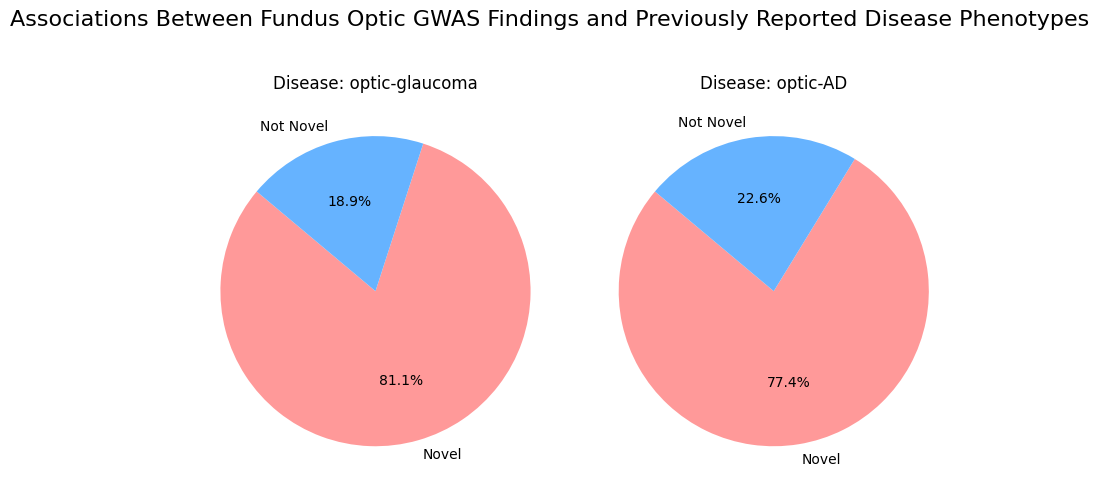

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os

# 获取所有符合条件的 CSV 文件
#csv_files = glob.glob("/home/wcy/data/UKB/eye_feature/disease_cor/novel_loci/pic_data/optic-*.csv")

csv_files =['/home/wcy/data/UKB/eye_feature/disease_cor/novel_loci/pic_data/optic-glaucoma.csv',
 '/home/wcy/data/UKB/eye_feature/disease_cor/novel_loci/pic_data/optic-AD.csv']
# 设置子图的行列数（根据文件数量动态调整）
num_files = len(csv_files)
cols = min(3, num_files)  # 每行最多 3 个图
rows = (num_files + cols - 1) // cols  # 计算行数

# 创建大画布
fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 5))
axes = axes.flatten()  # 展平以便索引

# 颜色映射
colors = ['#ff9999', '#66b3ff']  # 颜色方案

# 统一的图例标签
legend_labels = {True: "Novel", False: "Not Novel"}

for i, file in enumerate(csv_files):
    # 读取 CSV 文件
    df = pd.read_csv(file)

    # 统计 NOVEL 列的值
    value_counts = df["NOVEL"].value_counts()

    # 获取疾病名称（从文件名提取）
    disease_name = os.path.splitext(os.path.basename(file))[0].replace("flitter-", "")

    # 绘制饼图
    wedges, texts, autotexts = axes[i].pie(
        value_counts,
        labels=[legend_labels[key] for key in value_counts.index],
        autopct='%1.1f%%',
        startangle=140,
        colors=colors
    )

    # 设置标题
    axes[i].set_title(f"Disease: {disease_name}", fontsize=12)

# 移除多余的子图
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])




# 设置全局标题
plt.tight_layout(rect=[0, 0, 1, 0.95])  # 调整布局，给标题留出空间
plt.suptitle('Associations Between Fundus Optic GWAS Findings and Previously Reported Disease Phenotypes', 
             fontsize=16, x=0.4)

# 调整布局
plt.tight_layout(rect=[0, 0, 0.85, 0.95])  # 给图例留空间
plt.savefig(os.path.join("/home/wcy/data/UKB/eye_feature/disease_cor/novel_loci/pic_data/graphs/optic_result.png"), dpi=300, bbox_inches='tight')
plt.show()

In [68]:
csv_files

['/home/wcy/data/UKB/eye_feature/disease_cor/novel_loci/pic_data/optic-glaucoma.csv',
 '/home/wcy/data/UKB/eye_feature/disease_cor/novel_loci/pic_data/optic-AD.csv',
 '/home/wcy/data/UKB/eye_feature/disease_cor/novel_loci/pic_data/optic-ICH.csv']